# Imports

In [2]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 56.9 MB/s eta 0:00:0000:0100:01


In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from pymorphy3 import MorphAnalyzer
import pymorphy3
import numpy as np

import spacy


In [5]:
df = pd.read_excel("/kaggle/input/copy-pishu-tebe-april/_ _.xlsx")
df

,Unnamed: 0,Лицевая сторона - ссылка,Оборотная сторона - ссылка,Язык текста открытки,Текст открытки,Перевод текста открытки (если на иностранном языке),Вид орфографии,"Дата написания текста (если автор указал явно, не штемпели)",Адрес отправителя,Имя отправителя,...,Населенный пункт (откуда),Страна (куда),Населенный пункт (куда),Тег_1,Тег_2,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7
0,50,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,"{Милый Жоржик! Простите, голубчик, за молчание...",NaN,"Дореволюционная (ъ,ѣ и т.д.)",[отсутствует],г. Одесса,[отсутствует],...,"Херсонская губерния, Одесский уезд, г. Одесса",Российская Империя,"Тифлисская губерния, Тифлисский уезд, г. Тифлис",Шлю привет,Житейское,Дурные вести,Учеба,"Простите, что долго не писал",NaN,NaN
1,51,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Добрейший Паша! Будь добр вышли мне на консерв...,NaN,"Дореволюционная (ъ,ѣ и т.д.)",xx.xx.xxxx,Москва,М.Каневски,...,"Московская губерния, Московский уезд, г. Москва",Российская Империя,"Область Войска Донского, Ростовский уезд, г. Р...",Просьба,Рассказ об искусстве,Шлю привет,NaN,NaN,NaN,NaN
2,52,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Милая моя Олечка! Открытку твою получила. Спас...,NaN,"Дореволюционная (ъ,ѣ и т.д.)",1910-12-07 00:00:00,Одесса,[отсутствует],...,"Херсонская губерния, Одесский уезд, г. Одесса",Российская Империя,"Тифлисская губерния, Тифлисский уезд, г. Тифлис",Новости,Житейское,Дурные вести,Письма от семьи,Письма от мамы,Шлю привет,NaN
3,67,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,немецкий,Odessa. 30. 7. 01. Herzliche Grüße von [?M.Cho...,Сердечный привет от [?М. Холоденко],Латиница/дореволюционная,1901-07-30 00:00:00,Одесса,[?M.Cholodenko] [Перевод] [?М. Холоденко],...,г. Одесса,Германия,"Саксония, г. Дрезден",Шлю привет,Иностранный язык,NaN,NaN,NaN,NaN,NaN
4,68,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,иностранный язык,[отсутствует],NaN,Латиница,[отсутствует],[отсутствует],[отсутствует],...,[отсутствует],[отсутствует],[отсутствует],NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46726,362229,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,NaN,Современная,[отсутствует],[отсутствует],Алеся,...,[отсутствует],[отсутствует],[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,NaN,NaN,NaN,NaN
46727,362230,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,"С новым годом! Милая, и дорогая, Тома. От всей...",NaN,Современная,[отсутствует],[отсутствует],К.Ф. Хомченко,...,"РСФСР, г. Москва",СССР,"РСФСР, Московская обл., г. Лыткарино",Новый год,Поздравление в тексте,Поздравление на картинке,Шлю привет,NaN,NaN,NaN
46728,362231,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Дорогие мой [^мои] всех вас я поздравляю с нов...,NaN,Современная,[отсутствует],107082 Москва Б-82 Б. почтовая ул дом 18/20 ко...,Клава,...,"РСФСР, г. Москва",СССР,"РСФСР, Московская обл., г. Лыткарино",Новый год,Поздравление на картинке,Поздравление в тексте,NaN,NaN,NaN,NaN
46729,362232,https://storage.yandexcloud.net/postcards-resi...,https://storage.yandexcloud.net/postcards-resi...,русский,Тома! Сестренка ты моя Дорогая!!! От всего сер...,NaN,Современная,[отсутствует],[отсутствует],Валера,...,[отсутствует],[отсутствует],[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,Поцелуи из писем,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46731 entries, 0 to 46730
Data columns (total 34 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                    --------------  ----- 
 0   Unnamed: 0                                                                                                                                                46731 non-null  int64 
 1   Лицевая сторона - ссылка                                                                                                                                  46731 non-null  object
 2   Оборотная сторона - ссылка                                                                                                                                4673

In [6]:
df_filtered = df[df["Язык текста открытки"] == "русский"][["Текст открытки",
                                                           "Дата открытки (нормализованная)",
                                                           "Доп. сведения о получателе (например, титул, \"дядя\", \"товарищ\")",
                                                           "Доп. сведения об отправителе (например, титул, \"твой дядя\", \"князь\")",
                                                           "Тег_1",
                                                           "Тег_2",
                                                           "Тег_3",
                                                           "Тег_4",
                                                           "Тег_5",
                                                           "Тег_6",
                                                           "Тег_7"]]


In [ ]:
df_filtered

,Текст открытки,Дата открытки (нормализованная),"Доп. сведения о получателе (например, титул, ""дядя"", ""товарищ"")","Доп. сведения об отправителе (например, титул, ""твой дядя"", ""князь"")",Тег_1,Тег_2,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906-02-18 00:00:00,Его высокоблагородие,[отсутствует],Шлю привет,Житейское,Дурные вести,Учеба,"Простите, что долго не писал",NaN,NaN
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910-05-06 00:00:00,Его высокоблагородие,[отсутствует],Просьба,Рассказ об искусстве,Шлю привет,NaN,NaN,NaN,NaN
2,Милая моя Олечка! Открытку твою получила. Спас...,1910-12-07 00:00:00,Ее высокоблагородие,мама и бабушка,Новости,Житейское,Дурные вести,Письма от семьи,Письма от мамы,Шлю привет,NaN
5,Ст. Челябинск \n18/IV \nХристос Воскресе! От д...,1910-04-18 00:00:00,Ее высокоблагородие,[отсутствует],Житейское,Дурные вести,Поздравление в тексте,NaN,NaN,NaN,NaN
6,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906-12-23 00:00:00,Господин,[отсутствует],Поздравление в тексте,NaN,NaN,NaN,NaN,NaN,Рождество
...,...,...,...,...,...,...,...,...,...,...,...
46726,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1984-01-24 00:00:00,[отсутствует],[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,NaN,NaN,NaN,NaN
46727,"С новым годом! Милая, и дорогая, Тома. От всей...",1988-12-24 00:00:00,[отсутствует],[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,Шлю привет,NaN,NaN,NaN
46728,Дорогие мой [^мои] всех вас я поздравляю с нов...,1981-12-29 00:00:00,[отсутствует],[отсутствует],Новый год,Поздравление на картинке,Поздравление в тексте,NaN,NaN,NaN,NaN
46729,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1985-01-01 00:00:00,Сестренка,[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,Поцелуи из писем,NaN,NaN,NaN


In [7]:
df_filtered = df_filtered.dropna(subset=["Дата открытки (нормализованная)"])


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40058 entries, 0 to 46730
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Текст открытки                                                        40058 non-null  object
 1   Дата открытки (нормализованная)                                       40058 non-null  object
 2   Доп. сведения о получателе (например, титул, "дядя", "товарищ")       40058 non-null  object
 3   Доп. сведения об отправителе (например, титул, "твой дядя", "князь")  40058 non-null  object
 4   Тег_1                                                                 39780 non-null  object
 5   Тег_2                                                                 38057 non-null  object
 6   Тег_3                                                                 32212 non-null  object
 7   Тег_4    

In [8]:
df_filtered = df_filtered.copy()

df_filtered["Год открытки"] = pd.to_datetime(df_filtered["Дата открытки (нормализованная)"], errors='coerce').dt.year

df_filtered = df_filtered.dropna(subset=["Год открытки"])

df_filtered["Год открытки"] = df_filtered["Год открытки"].astype(int)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40056 entries, 0 to 46730
Data columns (total 12 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Текст открытки                                                        40056 non-null  object
 1   Дата открытки (нормализованная)                                       40056 non-null  object
 2   Доп. сведения о получателе (например, титул, "дядя", "товарищ")       40056 non-null  object
 3   Доп. сведения об отправителе (например, титул, "твой дядя", "князь")  40056 non-null  object
 4   Тег_1                                                                 39779 non-null  object
 5   Тег_2                                                                 38056 non-null  object
 6   Тег_3                                                                 32211 non-null  object
 7   Тег_4    

In [9]:
df_filtered = df_filtered[df_filtered["Год открытки"] >= 1900]
df_filtered = df_filtered.drop('Дата открытки (нормализованная)', axis=1)
df_filtered

,Текст открытки,"Доп. сведения о получателе (например, титул, ""дядя"", ""товарищ"")","Доп. сведения об отправителе (например, титул, ""твой дядя"", ""князь"")",Тег_1,Тег_2,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7,Год открытки
0,"{Милый Жоржик! Простите, голубчик, за молчание...",Его высокоблагородие,[отсутствует],Шлю привет,Житейское,Дурные вести,Учеба,"Простите, что долго не писал",NaN,NaN,1906
1,Добрейший Паша! Будь добр вышли мне на консерв...,Его высокоблагородие,[отсутствует],Просьба,Рассказ об искусстве,Шлю привет,NaN,NaN,NaN,NaN,1910
2,Милая моя Олечка! Открытку твою получила. Спас...,Ее высокоблагородие,мама и бабушка,Новости,Житейское,Дурные вести,Письма от семьи,Письма от мамы,Шлю привет,NaN,1910
5,Ст. Челябинск \n18/IV \nХристос Воскресе! От д...,Ее высокоблагородие,[отсутствует],Житейское,Дурные вести,Поздравление в тексте,NaN,NaN,NaN,NaN,1910
6,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,Господин,[отсутствует],Поздравление в тексте,NaN,NaN,NaN,NaN,NaN,Рождество,1906
...,...,...,...,...,...,...,...,...,...,...,...
46726,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,[отсутствует],[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,NaN,NaN,NaN,NaN,1984
46727,"С новым годом! Милая, и дорогая, Тома. От всей...",[отсутствует],[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,Шлю привет,NaN,NaN,NaN,1988
46728,Дорогие мой [^мои] всех вас я поздравляю с нов...,[отсутствует],[отсутствует],Новый год,Поздравление на картинке,Поздравление в тексте,NaN,NaN,NaN,NaN,1981
46729,Тома! Сестренка ты моя Дорогая!!! От всего сер...,Сестренка,[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,Поцелуи из писем,NaN,NaN,NaN,1985


In [10]:
df_filtered["decade"] = (df_filtered["Год открытки"] // 10) * 10
decade_counts = df_filtered["decade"].value_counts().sort_index() 
decade_counts


decade
1900    4188
1910    9904
1920     857
1930     824
1940     964
1950    2197
1960    6087
1970    6704
1980    6323
1990    1073
2000     268
2010     229
2020     379
Name: count, dtype: int64

# Register analysis

In [11]:
df_filtered_copy = df_filtered.copy()

In [12]:
df_filtered_copy['Доп. сведения о получателе (например, титул, "дядя", "товарищ")'] = df_filtered_copy['Доп. сведения о получателе (например, титул, "дядя", "товарищ")'] \
    .str.lower() \
    .str.replace(r'[^а-яё\s]', '', regex=True)  # Удаляем всё, кроме русских букв и пробелов

df_filtered_copy

,Текст открытки,"Доп. сведения о получателе (например, титул, ""дядя"", ""товарищ"")","Доп. сведения об отправителе (например, титул, ""твой дядя"", ""князь"")",Тег_1,Тег_2,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7,Год открытки,decade
0,"{Милый Жоржик! Простите, голубчик, за молчание...",его высокоблагородие,[отсутствует],Шлю привет,Житейское,Дурные вести,Учеба,"Простите, что долго не писал",NaN,NaN,1906,1900
1,Добрейший Паша! Будь добр вышли мне на консерв...,его высокоблагородие,[отсутствует],Просьба,Рассказ об искусстве,Шлю привет,NaN,NaN,NaN,NaN,1910,1910
2,Милая моя Олечка! Открытку твою получила. Спас...,ее высокоблагородие,мама и бабушка,Новости,Житейское,Дурные вести,Письма от семьи,Письма от мамы,Шлю привет,NaN,1910,1910
5,Ст. Челябинск \n18/IV \nХристос Воскресе! От д...,ее высокоблагородие,[отсутствует],Житейское,Дурные вести,Поздравление в тексте,NaN,NaN,NaN,NaN,1910,1910
6,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,господин,[отсутствует],Поздравление в тексте,NaN,NaN,NaN,NaN,NaN,Рождество,1906,1900
...,...,...,...,...,...,...,...,...,...,...,...,...
46726,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,отсутствует,[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,NaN,NaN,NaN,NaN,1984,1980
46727,"С новым годом! Милая, и дорогая, Тома. От всей...",отсутствует,[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,Шлю привет,NaN,NaN,NaN,1988,1980
46728,Дорогие мой [^мои] всех вас я поздравляю с нов...,отсутствует,[отсутствует],Новый год,Поздравление на картинке,Поздравление в тексте,NaN,NaN,NaN,NaN,1981,1980
46729,Тома! Сестренка ты моя Дорогая!!! От всего сер...,сестренка,[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,Поцелуи из писем,NaN,NaN,NaN,1985,1980


In [16]:
def count_sentences(text):
    """Подсчитывает количество предложений в тексте."""
    if isinstance(text, str):
        sentences = text.split('.')
        sentences += text.split('?')
        sentences += text.split('!')
        return len([s.strip() for s in sentences if s.strip()])


# Применяем функцию к столбцу и сохраняем результаты
df_filtered_copy['Количество предложений'] = df_filtered_copy['Текст открытки'].apply(count_sentences)

# Вычисляем описательную статистику
descriptive_stats = df_filtered_copy['Количество предложений'].describe()
descriptive_stats




count    39996.000000
mean         8.314456
std          4.097859
min          3.000000
25%          6.000000
50%          7.000000
75%         10.000000
max         61.000000
Name: Количество предложений, dtype: float64

In [25]:
!python -m spacy download ru_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 29.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [26]:
def get_most_common_adjectives_spacy(df, text_column='Текст открытки', num_adjectives=10, language_model="ru_core_news_md"):
    """
    Извлекает самые распространенные прилагательные из столбца DataFrame с использованием spaCy.
    """
    nlp = spacy.load(language_model)  # Загрузка языковой модели
    stop_words = nlp.Defaults.stop_words # множество стоп-слов

    def process_text(text):
      if isinstance(text, str):
        doc = nlp(text)
        adjectives = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ" and token.lemma_.lower() not in stop_words]
        return Counter(adjectives).most_common(num_adjectives)
      else:
        return []

    return df[text_column].apply(process_text)



most_common = get_most_common_adjectives_spacy(df_filtered_copy)
most_common


0        [(милый, 2), (уважительный, 1), (добрый, 1), (...
1                                         [(искренний, 1)]
2        [(милый, 1), (добрый, 1), (бедный, 1), (круглы...
5        [(тяжёлый, 2), (iv, 1), (весёлый, 1), (новый, ...
6        [(дорогой, 1), (христов, 1), (добрый, 1), (жив...
                               ...                        
46726    [(дорогой, 1), (новый, 1), (лююимым, 1), (двою...
46727    [(новый, 1), (милый, 1), (дорогой, 1), (хороши...
46728    [(дорогой, 1), (новый, 1), (1982, 1), (крепкий...
46729    [(дорогой, 1), (родный, 1), (1988, 1), (хороши...
46730    [(новый, 3), (добрый, 1), (больший, 1), (мален...
Name: Текст открытки, Length: 39997, dtype: object


In [ ]:
morph = MorphAnalyzer()

def lemmatize_text(text):
    words = text.split()
    lemmas = [morph.parse(word)[0].normal_form for word in words]
    return ' '.join(lemmas)

df_filtered_copy['Доп. сведения о получателе (например, титул, "дядя", "товарищ")'] = df_filtered_copy['Доп. сведения о получателе (например, титул, "дядя", "товарищ")'].apply(lemmatize_text)
df_filtered_copy

,Текст открытки,"Доп. сведения о получателе (например, титул, ""дядя"", ""товарищ"")","Доп. сведения об отправителе (например, титул, ""твой дядя"", ""князь"")",Тег_1,Тег_2,Тег_3,Тег_4,Тег_5,Тег_6,Тег_7,Год открытки,decade
0,"{Милый Жоржик! Простите, голубчик, за молчание...",он высокоблагородие,[отсутствует],Шлю привет,Житейское,Дурные вести,Учеба,"Простите, что долго не писал",NaN,NaN,1906,1900
1,Добрейший Паша! Будь добр вышли мне на консерв...,он высокоблагородие,[отсутствует],Просьба,Рассказ об искусстве,Шлю привет,NaN,NaN,NaN,NaN,1910,1910
2,Милая моя Олечка! Открытку твою получила. Спас...,она высокоблагородие,мама и бабушка,Новости,Житейское,Дурные вести,Письма от семьи,Письма от мамы,Шлю привет,NaN,1910,1910
5,Ст. Челябинск \n18/IV \nХристос Воскресе! От д...,она высокоблагородие,[отсутствует],Житейское,Дурные вести,Поздравление в тексте,NaN,NaN,NaN,NaN,1910,1910
6,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,господин,[отсутствует],Поздравление в тексте,NaN,NaN,NaN,NaN,NaN,Рождество,1906,1900
...,...,...,...,...,...,...,...,...,...,...,...,...
46726,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,отсутствовать,[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,NaN,NaN,NaN,NaN,1984,1980
46727,"С новым годом! Милая, и дорогая, Тома. От всей...",отсутствовать,[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,Шлю привет,NaN,NaN,NaN,1988,1980
46728,Дорогие мой [^мои] всех вас я поздравляю с нов...,отсутствовать,[отсутствует],Новый год,Поздравление на картинке,Поздравление в тексте,NaN,NaN,NaN,NaN,1981,1980
46729,Тома! Сестренка ты моя Дорогая!!! От всего сер...,сестрёнка,[отсутствует],Новый год,Поздравление в тексте,Поздравление на картинке,Поцелуи из писем,NaN,NaN,NaN,1985,1980


In [ ]:
# 1. Добавляем колонку с декадами (без удаления записей)
df_filtered_copy["decade"] = (df_filtered_copy["Год открытки"] // 10) * 10

# 2. Получаем уникальные декады
decades = sorted(df_filtered_copy["decade"].unique())

# 4. Анализ по декадам
for i, decade in enumerate(decades):
    # Фильтруем записи декады (без удаления)
    decade_data = df_filtered_copy[df_filtered_copy["decade"] == decade]

    # Считаем частоту фраз, исключая "отсутствовать" 
    phrases = [
        phrase
        for phrase in decade_data['Доп. сведения о получателе (например, титул, "дядя", "товарищ")']
        if phrase != "отсутствовать"
        if phrase.strip()
    ]
    phrase_counts = Counter(phrases)

    # Сортируем результаты
    counts_df = pd.DataFrame(phrase_counts.items(), columns=['Фраза', 'Частота'])
    counts_df = counts_df.sort_values('Частота', ascending=False)

    # Вывод с новой строки и ограничением 50 записей
    print(f"\nDecade: {decade}-{decade+9}\n{'='*30}")
    print(counts_df.head(50).to_string())  
    print("="*30)


Decade: 1900-1909
                                Фраза  Частота
13               она высокоблагородие      501
0                 он высокоблагородие      283
2                             госпожа      163
26                    она высокородие      155
1                            господин      129
9                 её высокоблагородие       85
42                     он высокородие       63
32                                евб       55
40                               мама       39
58             она превосходительство       37
72       он высокоблагородие господин       36
28                        мадемуазель       31
37                     её высокородие       27
15       она высокоблагородие госпожа       23
151                  высокоблагородие       21
30                               папа       20
52                               брат       20
24                               тётя       19
16                              мадам       18
54   она высокоблагородие мадемуазель    

In [ ]:
# 1. Добавляем колонку с декадами (без удаления записей)
df_filtered_copy["decade"] = (df_filtered_copy["Год открытки"] // 10) * 10

# 2. Получаем уникальные декады
decades = sorted(df_filtered_copy["decade"].unique())

# 4. Анализ по декадам
for i, decade in enumerate(decades):
    # Фильтруем записи декады (без удаления)
    decade_data = df_filtered_copy[df_filtered_copy["decade"] == decade]


    phrases = [
        str(phrase).strip()
        for col in ['Тег_1', 'Тег_2', 'Тег_3', 'Тег_4', 'Тег_5', 'Тег_6', 'Тег_7']  
        for phrase in decade_data[col]
        if not pd.isna(phrase) and str(phrase).strip() != ""
    ]
    phrase_counts = Counter(phrases)

    # Сортируем результаты
    counts_df = pd.DataFrame(phrase_counts.items(), columns=['Фраза', 'Частота'])
    counts_df = counts_df.sort_values('Частота', ascending=False)

    print(f"\nDecade: {decade}-{decade+9}\n{'='*30}")
    print(counts_df.head(50).to_string())
    print("="*30)


Decade: 1900-1909
                               Фраза  Частота
7                          Житейское     1764
1              Поздравление в тексте     1424
0                         Шлю привет     1085
2                            Новости      974
8                   Поцелуи из писем      968
17                           Поездка      782
51                    Из путешествия      406
47                             Пасха      363
44                           Именины      353
46                         Новый год      337
11                           Просьба      337
13                      Письма семье      332
4                    Письма от семьи      305
5                             В пути      289
59                      Виды городов      283
6             Благодарность в тексте      280
21               Загадочная открытка      224
10          Поздравление на картинке      224
3                              Адрес      217
28                  Дети на картинке      182
16             

# Linguistic features extraction

In [ ]:
df_ling = df_filtered[["Текст открытки", "Год открытки"]]

In [ ]:
df_ling["Текст открытки"] = df_ling["Текст открытки"].str.replace(r'\n|\t|\r', ' ', regex=True)

df_ling


<ipython-input-44-b361ce0a25d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ling["Текст открытки"] = df_ling["Текст открытки"].str.replace(r'\n|\t|\r', ' ', regex=True)


,Текст открытки,Год открытки
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910
2,Милая моя Олечка! Открытку твою получила. Спас...,1910
5,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910
6,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906
...,...,...
46726,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1984
46727,"С новым годом! Милая, и дорогая, Тома. От всей...",1988
46728,Дорогие мой [^мои] всех вас я поздравляю с нов...,1981
46729,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1985


In [ ]:
# Создаем колонку с декадами
df_ling['decade'] = (df_ling['Год открытки'] // 10) * 10

# Словарь для хранения DataFrame
decade_dfs = {}

# Группировка и сохранение
for decade, group in df_ling.groupby('decade'):
    decade_dfs[decade] = group[["Текст открытки", "Год открытки"]].copy()

    print(f"\nДекада {decade}-{decade+9} ({len(decade_dfs[decade])} записей)")


Декада 1900-1909 (4188 записей)

Декада 1910-1919 (9904 записей)

Декада 1920-1929 (857 записей)

Декада 1930-1939 (824 записей)

Декада 1940-1949 (964 записей)

Декада 1950-1959 (2197 записей)

Декада 1960-1969 (6087 записей)

Декада 1970-1979 (6704 записей)

Декада 1980-1989 (6323 записей)

Декада 1990-1999 (1073 записей)

Декада 2000-2009 (268 записей)

Декада 2010-2019 (229 записей)

Декада 2020-2029 (379 записей)


<ipython-input-45-6511342fe568>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ling['decade'] = (df_ling['Год открытки'] // 10) * 10


In [ ]:
decade_dfs[1900]

,Текст открытки,Год открытки
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906
6,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906
10,А.М.,1909
15,Христос Воскресе! Дорогой добрейший Ксенофонт ...,1907
21,Шлю привет и лучшие пожелания. Сейчас сижу в В...,1909
...,...,...
46700,26/V 08 Тепленько стало. В вагоне сплошь стоит...,1908
46707,[отсутствует],1907
46710,{<u>№: 16</u>} Какая интересная открытка! Выгр...,1909
46713,Глубокоуважаемый Андрей Яковлевич! По[...] оби...,1909


In [ ]:
!python -m spacy download ru_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.4/513.4 MB 3.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install stanza

In [ ]:
!nvcc --version
!pip install cupy-cuda12x

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
import stanza
import spacy
import cupy

# Инициализация моделей
if cupy.is_available():
    print("GPU доступен")
    spacy.prefer_gpu()
nlp_spacy = spacy.load("ru_core_news_lg")
stanza.download('ru')
nlp_stanza = stanza.Pipeline('ru', use_gpu=True)

GPU доступен


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ru (Russian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ru/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |
| ner       | wikiner            |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
indef_list = {'некто', 'нечто', 'некоторый', 'несколько', 'некий', 'кое-кто', "кое-что", "кое-какой", "кое-чей", "кто-то", "что-то", "какой-то", "чей-то", "кто-нибудь", "что-нибудь", "какой-нибудь", "чей-нибудь", "кто-либо", "что-либо", "какой-либо", "чей-либо"}

place_adv_list = {'вблизи',
                  'вверху',
                  'вдалеке',
                  'вдали',
                  'взаперти',
                  'вне',
                  'внизу',
                  'внутри',
                  'вовне',
                  'возле',
                  'вокруг',
                  'впереди',
                  'всюду',
                  'высоко',
                  'где',
                  'далеко',
                  'далёко',
                  'изнутри',
                  'навстречу',
                  'наособицу',
                  'невдалеке',
                  'недалеко',
                  'недалечко',
                  'неподалёку',
                  'низом',
                  'одаль',
                  'одесную',
                  'около',
                  'окрест',
                  'откуда',
                  'отсюда',
                  'передом',
                  'поблизости',
                  'повсюду',
                  'поодаль',
                  'посередине',
                  'посерёдке',
                  'посреди',
                  'посредине',
                  'прочь',
                  'рядом',
                  'сверху',
                  'сзади',
                  'слева',
                  'снаружи',
                  'снизу',
                  'спереди',
                  'справа',
                  'там',
                  'вверх',
                  'вниз',
                  'доселе',
                  'досель',
                  'дотуда',
                  'дотудова',
                  'изовсюду',
                  'кое-куда',
                  'кое-откуда',
                  'кой-куда',
                  'куда',
                  'куда угодно',
                  'куда-либо',
                  'куда-нибудь',
                  'куда-то',
                  'никуда',
                  'нигде',
                  'отколь',
                  'откуда',
                  'откуда-либо',
                  'откуда-то',
                  'откудова',
                  'отовсюду',
                  'отселе',
                  'отсель',
                  'отсюда',
                  'отсюдова',
                  'отсюду',
                  'оттелева',
                  'оттель',
                  'оттоль',
                  'оттуда',
                  'оттудова',
                  'сюда',
                  'туда',
                  'тут',
                  'туда-обратно',
                  'туда-сюда'
                  }

time_adv_list = {
'анадысь',
'ввек',
'вдалеке',
'вдали',
'весной',
'весною',
'вечером',
'вечор',
'вовремя',
'впоследствии',
'впредь',
'встарь',
'вчера',
'вчерась',
'давеча',
'давно',
'дальше',
'днём',
'днесь',
'днями',
'доднесь',
'долго',
'доле',
'долее',
'доныне',
'досветла',
'дотемна',
'древле',
'ежедневно',
'ежеквартально',
'ежемесячно',
'еженочно',
'еженощно',
'заблаговременно',
'завременно',
'завтра',
'задолго',
'зараз',
'заранее',
'засветло',
'засим',
'затем',
'затемно',
'зимой',
'зимою',
'издревле',
'иногда',
'испокон',
'каждодневно',
'каждомесячно',
'когда-либо',
'летом',
'навсегда',
'надолго',
'надысь',
'накануне',
'намедни',
'насовсем',
'наутро',
'невовремя',
'недавно',
'незадолго',
'несвоевременно',
'нонеча',
'нонче',
'ночию',
'ночью',
'ныне',
'нынече',
'нынче',
'однажды',
'отныне'
'первоначально',
'поднесь',
'подоле',
'подчас',
'позднее',
'поздно',
'позже',
'пока',
'покамест',
'покуда',
'поначалу',
'поныне',
'порой',
'после'
'послезавтра',
'прежде',
'ранее',
'рано',
'раньше',
'редко',
'сегодня',
'сейгод',
'сейчас',
'скоро',
'смальства',
'смолоду',
'сперва',
'спокон',
'сразу',
'стемна',
'сыздетства',
'сызмала',
'сызмалу',
'сызмальства',
'теперича',
'теперь',
'третёвось',
'третьёвось',
'утром',
'часто',
'ща',
'щас'
}

In [ ]:
# Загрузка данных словаря абстрактных слов
abstraction_df_noun = pd.read_csv('/content/Slovar.r.ya..s.indeksom.konkretnosti.slov.csv')
abstraction_df_adj = pd.read_csv ('/content/Slovar.r.ya..s.indeksom.konkretnosti.slov_прил.csv')

In [ ]:
abstraction_df_noun

,word,score,Индекс С/A
0,туфельки,35.0000,4.555348
1,шаровары,35.0000,4.555348
2,сапожки,32.0000,4.465736
3,горсовета,31.0000,4.433987
4,плащи,31.0000,4.433987
...,...,...,...
63946,явление,0.0029,-4.843045
63947,утверждение,0.0029,-4.843045
63948,необходимость,0.0028,-4.878136
63949,признание,0.0028,-4.878136


In [ ]:
abstraction_df_adj

,w,score,Индекс С/A
0,новенький,76.0000,5.330733
1,кожаная,60.0000,5.094345
2,самодельный,49.0000,4.891820
3,шерстяной,49.0000,4.891820
4,тоненькая,46.0000,4.828641
...,...,...,...
23875,необыкновенную,0.0089,-3.721704
23876,социальную,0.0084,-3.779524
23877,радостное,0.0074,-3.906275
23878,исключительную,0.0072,-3.933674


In [ ]:
from collections import defaultdict

def normalize_noun(word):
    """Нормализация существительных с обработкой исключений"""
    try:
        parsed = morph.parse(str(word))[0]
        if 'NOUN' in parsed.tag:
            return parsed.normal_form.lower().strip()
        return str(word).lower().strip()
    except:
        return str(word).lower().strip()

def normalize_adj(word):
    """Нормализация прилагательных с обработкой исключений"""
    try:
        parsed = morph.parse(str(word))[0]
        if 'ADJF' in parsed.tag:
            return parsed.normal_form.lower().strip()
        return str(word).lower().strip()
    except:
        return str(word).lower().strip()

# Обработка существительных
normalized_dict_noun = defaultdict(list)

for raw_word, score in zip(abstraction_df_noun['word'], abstraction_df_noun['Индекс С/A']):
    normalized = normalize_noun(raw_word)
    normalized_dict_noun[normalized].append(float(score))  # Конвертация в float

abstraction_dict_noun = {}
for lemma, scores in normalized_dict_noun.items():
    abstraction_dict_noun[lemma] = sum(scores) / len(scores)  # Ручной расчет среднего

print({k: v for k, v in list(abstraction_dict_noun.items())[:5]})

# Обработка прилагательных
abstraction_df_adj = abstraction_df_adj.copy()
abstraction_df_adj['Индекс С/A'] = abstraction_df_adj['Индекс С/A'].astype(float)
abstraction_df_adj['normalized'] = abstraction_df_adj['w'].apply(normalize_adj)

abstraction_dict_adj = (
    abstraction_df_adj
    .groupby('normalized')['Индекс С/A']
    .mean()
    .to_dict()
)

print({k: float(v) for k, v in list(abstraction_dict_adj.items())[:5]})


{'туфелька': 2.5299385246000003, 'шаровары': 3.2013158180000003, 'сапожок': 2.40869740075, 'горсовет': 2.716993602, 'плащ': 2.1715183975000003}
{'абиссинская': 1.693147181, 'абиссинский': 0.306852819, 'абонементный': 1.0, 'абордажные': 1.0, 'абразивная': 1.223143551}


In [ ]:
import re
# Предварительная настройка
dim_patterns = [re.compile(rf'({s})[а-я]*$') for s in [
    'ик', 'ек', 'к', 'ок', 'ёк', 'ец', 'иц',
    'очк', 'ечк', 'оньк', 'еньк', 'ышк', 'ишк', 'ушк', 'юшк'
]]

In [ ]:
from collections import deque
class RussianTextAnalyzer:
    def __init__(self, text):
        self.text = text
        self.text_len = len(text)
        self.spacy_doc = nlp_spacy(text)
        self.stanza_doc = nlp_stanza(text)
        self.words = [token.text for token in self.spacy_doc if not token.is_punct]
        self.abstraction_dict_noun = {k: float(v) for k, v in abstraction_dict_noun.items()}
        self.abstraction_dict_adj = {k: float(v) for k, v in abstraction_dict_adj.items()}

        # Инициализируем счетчики
        self.features = {}

    def analyze(self):
        self._lexical_features()
        self._syntactic_features()
        self._morphological_features()
        return self.features

    def _lexical_features(self):
        # Лексические признаки
        pos_counts = Counter(token.pos_ for token in self.spacy_doc)

        gram_spacy = {}
        for token in self.spacy_doc:
          if token.pos_ not in gram_spacy:
            gram_spacy[token.pos_] = Counter(token.morph.to_dict().values())
          else:
            gram_spacy[token.pos_] += Counter(token.morph.to_dict().values())

        gram_stanza = {}
        for sent in self.stanza_doc.sentences:
          for word in sent.words:
            if word.upos not in gram_stanza:
              gram_stanza[word.upos] = Counter(dict(item.split('=') for item in word.feats.split('|')).values() if word.feats else {})
            else:
              gram_stanza[word.upos] += Counter(dict(item.split('=') for item in word.feats.split('|')).values() if word.feats else {})



        def analyze_abstr():
            upos_lemmas = [
                (word.upos, word.lemma.lower().strip())
                for sent in self.stanza_doc.sentences
                for word in sent.words
            ]

            scores_noun = []
            scores_adj = []
            total_nouns = 0
            total_adj = 0

            for upos, lemma in upos_lemmas:
                if upos == 'NOUN':
                    total_nouns += 1
                    if lemma in self.abstraction_dict_noun:
                        scores_noun.append(float(self.abstraction_dict_noun[lemma]))  # Явное преобразование
                if upos == 'ADJ':
                    total_adj += 1
                    if lemma in self.abstraction_dict_adj:
                        scores_adj.append(float(self.abstraction_dict_adj[lemma]))

            # Расчет статистики
            mean_noun = sum(scores_noun)/len(scores_noun) if scores_noun else None
            mean_adj = sum(scores_adj)/len(scores_adj) if scores_adj else None
            sorted_scores_noun = sorted(scores_noun)
            sorted_scores_adj = sorted(scores_adj)
            n_noun = len(sorted_scores_noun)
            n_adj = len(sorted_scores_adj)
            median_noun = (
                sorted_scores_noun[n_noun//2]
                if n_noun % 2 else
                (sorted_scores_noun[n_noun//2-1] + sorted_scores_noun[n_noun//2])/2
            ) if scores_noun else None
            median_adj = (
                sorted_scores_adj[n_adj//2]
                if n_adj % 2 else
                (sorted_scores_adj[n_adj//2-1] + sorted_scores_adj[n_adj//2])/2
            ) if scores_adj else None

            return {
                'mean_score_noun': mean_noun,
                'mean_score_adj': mean_adj,
                'median_score_noun': median_noun,
                'median_score_adj': median_adj,
                'coverage_noun': len(scores_noun)/total_nouns if total_nouns else 0.0,
                'coverage_adj': len(scores_adj)/total_adj if total_adj else 0.0,
                'total_nouns': total_nouns,
                'total_adj': total_adj
            }

        abstr_pos = analyze_abstr()
        self.features.update({
            'first_person_pronouns_sing': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=First' in t.morph
                                                and 'Number=Sing' in t.morph
                                              ),
            'first_person_pronouns_plur': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=First' in t.morph
                                                and 'Number=Plur' in t.morph
                                              ),
            'second_person_pronouns_sing': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Second' in t.morph
                                                and 'Number=Sing' in t.morph
                                              ),
            'second_person_pronouns_plur': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Second' in t.morph
                                                and 'Number=Plur' in t.morph
                                              ),
            'third_person_pronouns_masc': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Third' in t.morph
                                                and 'Gender=Masc' in t.morph
                                              ),
            'third_person_pronouns_fem': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Third' in t.morph
                                                and 'Gender=Fem' in t.morph
                                            ),
            'third_person_pronouns_neut': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Third' in t.morph
                                                and 'Gender=Neut' in t.morph
                                             ),
            'third_person_pronouns_plur': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Third' in t.morph
                                                and 'Number=Plur' in t.morph
                                             ),
            'demonstrative_pronouns': gram_stanza.get('DET', Counter()).get('Dem',0),
            'prepositions': pos_counts.get('ADP', 0),
            'conjunctions': pos_counts.get('CCONJ', 0) + pos_counts.get('SCONJ', 0),
            'indefinite_pronouns': sum(
                                        1
                                        for sent in self.stanza_doc.sentences
                                        for word in sent.words
                                        if word.lemma.lower() in indef_list
                                        and word.upos in {'DET', 'PRON'}
                                    ),
            'place_adverbials': sum(
                                        1
                                        for sent in self.stanza_doc.sentences
                                        for word in sent.words
                                        if word.lemma.lower() in place_adv_list
                                        and word.upos in {'ADV'}
                                    ),
            'time_adverbials': sum(
                                        1
                                        for sent in self.stanza_doc.sentences
                                        for word in sent.words
                                        if word.lemma.lower() in time_adv_list
                                        and word.upos in {'ADV'}
                                    ),
            'noun_anim': sum(
                                  1
                                  for t in self.spacy_doc
                                  if t.pos_ == 'NOUN'
                                  and 'Animacy=Anim' in t.morph
                                ),
            'noun_inan': sum(
                              1
                              for t in self.spacy_doc
                              if t.pos_ == 'NOUN'
                              and 'Animacy=Inan' in t.morph
                            ),
            'noun_abstr_index': abstr_pos['mean_score_noun'],
            'adj_abstr_index': abstr_pos['mean_score_adj'],
            'latin_letters': sum(1
                                    for token in self.spacy_doc
                                    if any('LATN' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'propr_name': sum(1
                                    for token in self.spacy_doc
                                    if any('Name' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'patr_name': sum(1
                                    for token in self.spacy_doc
                                    if any('Patr' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'sur_name': sum(1
                                    for token in self.spacy_doc
                                    if any('Surn' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'praedicative': sum(1
                                    for token in self.spacy_doc
                                    if any('PRED' in parse.tag for parse in morph.parse(token.text)) or any('Prdx' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'geo_name': sum(
                              1
                              for token in self.spacy_doc
                              if token.pos_ == "PROPN"
                              if any('Geox' in parse.tag for parse in morph.parse(token.text))
                              ),
            'intj': sum(1
                                    for token in self.spacy_doc
                                    if any('INTJ' in parse.tag for parse in morph.parse(token.text))
                                  )
        })


    def _syntactic_features(self):
        # Синтаксические признаки
        sentence_lengths = [len(sent.text.split()) for sent in self.spacy_doc.sents]

        def is_minor_constituent(word, sentence):
            """Определяет тип сочинительной конструкции"""
            if word.head == 0:
                return None

            head = sentence.words[word.head - 1]

            # Определяем тип конструкции
            if word.deprel == 'conj':
                if head.upos == 'NOUN' and word.upos == 'NOUN':
                    return 'NOUN'
                elif head.upos == 'ADJ' and word.upos == 'ADJ':
                    return 'ADJ'
                elif head.upos == 'VERB' and word.upos == 'VERB':
                    return 'VERB'
                elif head.upos == 'ADV' and word.upos == 'ADV':
                    return 'ADV'
                elif head.deprel in {'obj', 'nsubj', 'nmod'}:
                    return 'NOUN'  # Для именных дополнений
                elif head.deprel == 'amod':
                    return 'ADJ'   # Для определений
                elif head.deprel == 'advmod':
                    return 'ADV'   # Для обстоятельств

            return None

        def extract_minor_coordinations(text):
            doc = self.stanza_doc
            coordination_counts = {
                'NOUN': 0,
                'ADJ': 0,
                'VERB': 0,
                'ADV': 0,
                'OTHER': 0
            }

            for sentence in doc.sentences:
                for word in sentence.words:
                    if word.deprel == 'conj':
                        const_type = is_minor_constituent(word, sentence)
                        if const_type:
                            if const_type in coordination_counts:
                                coordination_counts[const_type] += 1
                            else:
                                coordination_counts['OTHER'] += 1

            return coordination_counts

        coordination_counts = extract_minor_coordinations(text)

        def analyze_tree(text):
            doc = self.stanza_doc
            features = {
                'max_tree_depth': 0,
                'avg_np_length': 0.0,
                'avg_vp_length': 0.0,
                'inversion_count': 0,
                'ellipsis_count': 0
            }

            all_depths = []
            np_lengths = []
            vp_lengths = []

            for sentence in doc.sentences:
                # 2.1. Глубина дерева
                depths = _calculate_depths(sentence)
                all_depths.extend(depths)

                # 2.2. Длина NP/VP
                nps = _extract_phrases(sentence, 'NP')
                vps = _extract_phrases(sentence, 'VP')
                np_lengths.extend([len(np) for np in nps])
                vp_lengths.extend([len(vp) for vp in vps])

                # 2.3. Инверсии
                features['inversion_count'] += _count_inversions(sentence)

                # 2.4. Эллипсис
                features['ellipsis_count'] += sum(1 for word in sentence.words
                                                if word.deprel == 'orphan')

            # Расчет итоговых значений
            if all_depths:
                features['max_tree_depth'] = max(all_depths)
            if np_lengths:
                features['avg_np_length'] = sum(np_lengths)/len(np_lengths)
            if vp_lengths:
                features['avg_vp_length'] = sum(vp_lengths)/len(vp_lengths)

            return features

        def _calculate_depths(sentence):
            """Расчет глубины дерева с использованием BFS"""
            depths = []
            root = next((word for word in sentence.words if word.head == 0), None)
            if not root:
                return []

            queue = deque([(root, 0)])
            visited = set()

            while queue:
                word, depth = queue.popleft()
                if word.id in visited:
                    continue
                visited.add(word.id)
                depths.append(depth)

                # Добавляем дочерние узлы
                children = [w for w in sentence.words if w.head == word.id]
                for child in children:
                    queue.append((child, depth + 1))

            return depths

        def _extract_phrases(sentence, phrase_type):
            """Извлечение фраз с фильтрацией"""
            phrases = []
            targets = {
                'NP': ['NOUN', 'PROPN', 'PRON'],
                'VP': ['VERB', 'AUX']
            }

            for word in sentence.words:
                if word.upos in targets[phrase_type]:
                    phrase = _get_phrase(sentence, word.id)
                    if _is_valid_phrase(phrase_type, sentence, phrase):
                        phrases.append(phrase)

            return phrases

        def _get_phrase(sentence, head_id):
            """Поиск в ширину для более точного определения границ фразы"""
            phrase = []
            queue = deque([head_id])
            visited = set()

            while queue:
                current_id = queue.popleft()
                if current_id in visited:
                    continue
                visited.add(current_id)

                phrase.append(current_id)
                current_word = sentence.words[current_id-1]

                # Добавляем только непосредственные зависимые
                children = [w.id for w in sentence.words
                          if w.head == current_id
                          and w.deprel not in ['punct', 'cc', 'mark']]
                queue.extend(children)

            return sorted(phrase)

        def _is_valid_phrase(phrase_type, sentence, phrase_ids):
            """Проверка валидности извлеченной фразы"""
            if len(phrase_ids) < 1:
                return False

            main_word = sentence.words[phrase_ids[0]-1]

            if phrase_type == 'NP':
                return main_word.upos in ['NOUN', 'PROPN', 'PRON']
            elif phrase_type == 'VP':
                return main_word.upos in ['VERB', 'AUX']
            return False

        def _count_inversions(sentence):
            """Подсчет инверсий"""
            inversions = 0
            for word in sentence.words:
                if word.deprel == 'nsubj':
                    verb = sentence.words[word.head-1]
                    # Более гибкое условие для русского языка
                    if word.id > verb.id and (word.id - verb.id) >= 1:
                        context = sentence.words[verb.id-1:word.id]
                        if not any(w.deprel == 'advmod' for w in context):
                            inversions += 1
            return inversions

        tree_analysis = analyze_tree(text)

        def count_syllables_ru(word):
            """Пподсчет слогов для русского языка"""
            vowels = 'аеёиоуыэюя'
            word = word.lower()
            count = 0
            prev_vowel = False

            for char in word:
                if char in vowels:
                    if not prev_vowel:  # Учитываем только последовательные гласные как один слог
                        count += 1
                    prev_vowel = True
                else:
                    prev_vowel = False

            # Гарантируем минимум 1 слог для коротких слов
            return max(1, count)

        def flesch_kincaid_russian(text):
            """Адаптированная формула для русского языка: 206.835 − 1.52 × ASL − 65.14 × ASW"""
            try:

                # Сбор статистики
                sentences = self.stanza_doc.sentences
                num_sentences = len(sentences)
                words = [word.text for sent in sentences for word in sent.words]
                num_words = len(words)

                if num_sentences == 0 or num_words == 0:
                    return 0.0

                # Подсчет слогов
                total_syllables = sum(count_syllables_ru(word) for word in words)

                # Расчет показателей
                ASL = num_words / num_sentences  # Average Sentence Length
                ASW = total_syllables / num_words  # Average Syllables per Word

                # Применение формулы
                score = 206.835 - 1.52 * ASL - 65.14 * ASW

                # Ограничение диапазона 0-100
                return max(0, min(100, round(score, 2)))

            except Exception as e:
                print(f"Ошибка при обработке текста: {e}")
                return 0.0

        flesch_kincaid_index = flesch_kincaid_russian(self.text)


        self.features.update({
            'mean_sentence_length': sum(sentence_lengths)/len(sentence_lengths) if sentence_lengths else 0,
            'subordinate_clauses': sum(1 for token in self.spacy_doc if token.dep_ == 'mark'),
            'type-token ratio': len(set(self.words)) / len(self.words) * 100 if self.words else 0,
            'word length': sum(len(word) for word in self.words) / len(self.words),
            'noun_coordination': coordination_counts['NOUN'],
            'adj_coordination': coordination_counts['ADJ'],
            'verb_coordination': coordination_counts['VERB'],
            'adv_coordination': coordination_counts['ADV'],
            'other_coordination': coordination_counts['OTHER'],
            'max_tree_depth': tree_analysis['max_tree_depth'],
            'avg_np_length': tree_analysis['avg_np_length'],
            'avg_vp_length': tree_analysis['avg_vp_length'],
            'inversion_count': tree_analysis['inversion_count'],
            'ellipsis_count': tree_analysis['ellipsis_count'],
            'flesch_kincaid_index': flesch_kincaid_index
        })

    def _morphological_features(self):
        # Морфологические признаки

        self.features.update({
            'perfect_aspect': sum(1 for token in self.spacy_doc if  token.pos_ == 'VERB' and 'Aspect=Perf' in token.morph),
            'imperfect_aspect': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Aspect=Imp' in token.morph),
            'past_tense': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Tense=Past' in token.morph),
            'present_tense': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Tense=Pres' in token.morph),
            'fut_tense': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Tense=Fut' in token.morph),
            'ind_mood_verb': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Mood=Ind' in token.morph),
            'imp_mood_verb': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Mood=Imp' in token.morph),
            'cnd_mood_verb': sum(1 for token in self.spacy_doc if token.pos_ == 'AUX' and 'Mood=Cnd' in token.morph),
            'gerunds': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'VerbForm=Conv' in token.morph),
            'participles': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'VerbForm=Part' in token.morph),
            'infinitives': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'VerbForm=Inf' in token.morph),
            'finite_verbs': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'VerbForm=Fin' in token.morph),
            'passive_voice': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Voice=Pass' in token.morph),
            'active_voice': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Voice=Act' in token.morph),
            'middle_voice': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Voice=Mid' in token.morph),
            'neg_polarity': sum(1 for token in self.spacy_doc if token.pos_ == 'PART' and 'Polarity=Neg' in token.morph),
            'first_pers_verb_sing': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Sing' and 'Person=First') in token.morph),
            'second_pers_verb_sing': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Sing' and 'Person=Second') in token.morph),
            'third_pers_verb_sing': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Sing' and 'Person=Third') in token.morph),
            'first_pers_verb_plur': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Plur' and 'Person=First') in token.morph),
            'second_pers_verb_plur': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Plur' and 'Person=Second') in token.morph),
            'third_pers_verb_plur': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Plur' and 'Person=Third') in token.morph),
            'trans_verb': sum(
                              1
                              for token in self.spacy_doc
                              if token.pos_ == "VERB"
                              if any('tran' in parse.tag for parse in morph.parse(token.text))
                              ),
            'intr_verb': sum(
                              1
                              for token in self.spacy_doc
                              if token.pos_ == "VERB"
                              if any('intr' in parse.tag for parse in morph.parse(token.text))
                              ),
            'not_inv_verb': sum(
                              1
                              for token in self.spacy_doc
                              if token.pos_ == "VERB"
                              if any('excl' in parse.tag for parse in morph.parse(token.text))
                              ),
            'sing_noun': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Number=Sing' in token.morph),
            'plur_noun': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Number=Plur' in token.morph),
            'plr_tantum_noun': sum(
                                    1
                                    for token in self.spacy_doc
                                    if token.pos_ == "NOUN"
                                    if any('Pltm' in parse.tag for parse in morph.parse(token.text))
                                   ),
            'sing_tantum_noun': sum(
                                    1
                                    for token in self.spacy_doc
                                    if token.pos_ == "NOUN"
                                    if any('Sgtm' in parse.tag for parse in morph.parse(token.text))
                                   ),
            'noun_fem': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Gender=Fem' in token.morph),
            'noun_masc': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Gender=Masc' in token.morph),
            'noun_neut': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Gender=Neut' in token.morph),
            'noun_case_nom': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Nom' in token.morph),
            'noun_case_gen': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Gen' in token.morph),
            'noun_case_dat': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Dat' in token.morph),
            'noun_case_acc': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Acc' in token.morph),
            'noun_case_loc': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Loc' in token.morph),
            'noun_case_ins': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Ins' in token.morph),
            'noun_case_voc': sum(
                                    1
                                    for token in self.spacy_doc
                                    if token.pos_ == "NOUN"
                                    if any('voct' in parse.tag for parse in morph.parse(token.text))
                                ),
            'fixed_noun': sum(
                                    1
                                    for token in self.spacy_doc
                                    if token.pos_ == "NOUN"
                                    if any('Fixd' in parse.tag for parse in morph.parse(token.text))
                                ),
            'sing_adj': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Number=Sing' in token.morph),
            'plur_adj': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Number=Plur' in token.morph),
            'adj_fem': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Gender=Fem' in token.morph),
            'adj_masc': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Gender=Masc' in token.morph),
            'adj_neut': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Gender=Neut' in token.morph),
            'adj_case_nom': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Nom' in token.morph),
            'adj_case_gen': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Gen' in token.morph),
            'adj_case_dat': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Dat' in token.morph),
            'adj_case_acc': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Acc' in token.morph),
            'adj_case_loc': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Loc' in token.morph),
            'adj_case_ins': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Ins' in token.morph),
            'adj_case_voc': sum(
                                    1
                                    for token in self.spacy_doc
                                    if token.pos_ == "ADJ"
                                    if any('voct' in parse.tag for parse in morph.parse(token.text))
                                ),
            'adj_degree_pos': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Degree=Pos' in token.morph),
            'adj_degree_comp': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Degree=Cmp' in token.morph),
            'adj_degree_super': sum(1
                                    for token in self.spacy_doc
                                    if token.pos_ == 'ADJ'
                                    if any('Supr' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'full_adj': sum(1 for token in self.spacy_doc if any('ADJF' in parse.tag for parse in morph.parse(token.text))),
            'shrot_adj': sum(1 for token in self.spacy_doc if any('ADJS' in parse.tag for parse in morph.parse(token.text)) and 'StyleVariant=Short' in token.morph),
            'adv_degree_pos': sum(1 for token in self.spacy_doc if token.pos_ == 'ADV' and 'Degree=Pos' in token.morph),
            'adv_degree_comp': sum(1 for token in self.spacy_doc if token.pos_ == 'ADV' and 'Degree=Cmp' in token.morph),
            'quant_num': sum(1 for token in self.spacy_doc if token.pos_ == 'NUM'),
            'anum_num': sum(1
                                    for token in self.spacy_doc
                                    if token.pos_ == 'ADJ'
                                    if any('Anum' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'dim_nouns': sum(1 for t in self.spacy_doc  if t.pos_ == 'NOUN' and any(p.search(t.lemma_.lower()) for p in dim_patterns)),
            'dim_adj': sum(1 for t in self.spacy_doc  if t.pos_ == 'ADJ' and any(p.search(t.lemma_.lower()) for p in dim_patterns))
        })


In [ ]:
from google.colab import drive

# Подключаем Google Drive
drive.mount('/content/drive')

# Путь к папке на Google Drive, куда будем сохранять файл 
output_path = '/content/drive/My Drive/'  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.path.exists(output_path)

True

In [ ]:
total_rows = len(df_ling) # всего строк
processed_rows = 0 # обработано строк
features_list = []

# Обрабатываем тексты и сохраняем результаты
for idx, text in enumerate(df_ling['Текст открытки']):
    if pd.isna(text) or len(text.strip()) == 0:
        processed_rows += 1
        features_list.append({})
        continue

    try:
        analyzer = RussianTextAnalyzer(text)
        features = analyzer.analyze()
        features_list.append(features)
    except Exception as e:
        print(f"Ошибка при обработке текста: {e}")
        features_list.append({})  # Добавляем пустой словарь при ошибке

    processed_rows += 1

    # Выводим статистику (каждые 100 обработанных строк)
    if processed_rows % 100 == 0:
        percentage_complete = (processed_rows / total_rows) * 100
        print(f"Обработано строк: {processed_rows}/{total_rows} ({percentage_complete:.2f}%)")


# Создаем временный DataFrame с результатами
temp_df = pd.DataFrame(features_list).add_suffix('_abs')

# Удаляем существующие столбцы перед объединением
existing_cols = df_ling.columns.intersection(temp_df.columns)
df_ling = df_ling.drop(columns=existing_cols)

# Объединяем с исходным DataFrame
df_ling = pd.concat([df_ling.reset_index(drop=True),
                    temp_df.reset_index(drop=True)], axis=1)

print(f"Всего обработано строк: {processed_rows}")

# Сохраняем DataFrame в CSV файл на Google Drive
file_name = 'processed_data.csv' 
df_ling.to_csv(output_path + file_name, index=False) 
df_ling.to_csv('output_with_params.csv', index=False, encoding='utf-8')

print(f"DataFrame сохранен в файл: {output_path + file_name}")


Обработано строк: 100/39997 (0.25%)
Обработано строк: 200/39997 (0.50%)
Обработано строк: 300/39997 (0.75%)
Обработано строк: 400/39997 (1.00%)
Обработано строк: 500/39997 (1.25%)
Обработано строк: 600/39997 (1.50%)
Обработано строк: 700/39997 (1.75%)
Обработано строк: 800/39997 (2.00%)
Обработано строк: 900/39997 (2.25%)
Обработано строк: 1000/39997 (2.50%)
Обработано строк: 1100/39997 (2.75%)
Обработано строк: 1200/39997 (3.00%)
Обработано строк: 1300/39997 (3.25%)
Обработано строк: 1400/39997 (3.50%)
Обработано строк: 1500/39997 (3.75%)
Обработано строк: 1600/39997 (4.00%)
Обработано строк: 1700/39997 (4.25%)
Обработано строк: 1800/39997 (4.50%)
Обработано строк: 1900/39997 (4.75%)
Обработано строк: 2000/39997 (5.00%)
Обработано строк: 2100/39997 (5.25%)
Обработано строк: 2200/39997 (5.50%)
Обработано строк: 2300/39997 (5.75%)
Обработано строк: 2400/39997 (6.00%)
Обработано строк: 2500/39997 (6.25%)
Обработано строк: 2600/39997 (6.50%)
Обработано строк: 2700/39997 (6.75%)
Обработано

In [ ]:
df_ling.to_csv('output_with_params.csv', index=False, encoding='utf-8')


In [ ]:
df_ling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39997 entries, 0 to 39996
Columns: 106 entries, Текст открытки to dim_adj_abs
dtypes: float64(103), int64(2), object(1)
memory usage: 32.3+ MB


In [ ]:

# Пример использования
text = """
В лесу родилась ёлочка, в лесу она росла.
Зимой и летом стройная, зелёная была.
Метель ей пела песенку: «Спи, ёлочка, бай-бай!»
Мороз снежком укутывал: «Смотри, не замерзай!
Печатался журнал людьми»
там ах красив
"""

analyzer = RussianTextAnalyzer(text)
results = analyzer.analyze()

for k, v in results.items():
    print(f"{k}: {v}")


first_person_pronouns_sing: 0
first_person_pronouns_plur: 0
second_person_pronouns_sing: 0
second_person_pronouns_plur: 0
third_person_pronouns_masc: 0
third_person_pronouns_fem: 2
third_person_pronouns_neut: 0
third_person_pronouns_plur: 0
demonstrative_pronouns: 0
prepositions: 2
conjunctions: 1
indefinite_pronouns: 0
place_adverbials: 1
time_adverbials: 0
noun_anim: 2
noun_inan: 14
noun_abstr_index: 0.2043956932715476
adj_abstr_index: 0.7780269525
latin_letters: 0
propr_name: 1
patr_name: 1
sur_name: 3
praedicative: 3
geo_name: 0
intj: 2
mean_sentence_length: 8.25
subordinate_clauses: 0
type-token ratio: 78.04878048780488
word length: 4.170731707317073
noun_coordination: 1
adj_coordination: 1
verb_coordination: 2
adv_coordination: 0
other_coordination: 0
max_tree_depth: 5
avg_np_length: 1.4166666666666667
avg_vp_length: 3.5
inversion_count: 2
ellipsis_count: 0
flesch_kincaid_index: 82.2
perfect_aspect: 1
imperfect_aspect: 4
past_tense: 5
present_tense: 0
fut_tense: 0
ind_mood_verb: 

# Factor analysis

In [4]:
feature_matrix = pd.read_csv("/kaggle/input/pishu-tebe/output_with_params_pt.csv")
feature_matrix

,Текст открытки,Год открытки,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906,1900,4.0,1.0,0.0,2.0,4.0,0.0,0.0,...,0.0,0.0,18.0,0.0,9.0,0.0,0.0,0.0,8.0,0.0
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,1910,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,1910,0.0,2.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,20.0,1.0,13.0,1.0,2.0,0.0,9.0,1.0
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,1910,3.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,7.0,2.0,3.0,0.0,2.0,0.0,1.0,1.0
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906,1900,1.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1984,1980,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,12.0,1.0,5.0,0.0,0.0,0.0,2.0,0.0
39993,"С новым годом! Милая, и дорогая, Тома. От всей...",1988,1980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
39994,Дорогие мой [^мои] всех вас я поздравляю с нов...,1981,1980,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
39995,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1985,1980,1.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,1.0,22.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0


In [5]:
feature_matrix['Текст открытки'].astype(str).apply(
    lambda x: len(x.split()) if x.strip() != '' else 0  # Игнорируем пустые строки
).describe()

count    39997.000000
mean        36.975773
std         25.111821
min          1.000000
25%         22.000000
50%         30.000000
75%         45.000000
max        341.000000
Name: Текст открытки, dtype: float64

In [6]:
import pandas as pd
import numpy as np

# 1. Создаем столбец с длиной текста в словах
def get_text_length(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return 0  # Обработка NaN и нестроковых значений

# Применяем функцию к столбцу с текстом
feature_matrix['text_length'] = feature_matrix['Текст открытки'].apply(get_text_length)
feature_matrix

,Текст открытки,Год открытки,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,text_length
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906,1900,4.0,1.0,0.0,2.0,4.0,0.0,0.0,...,0.0,18.0,0.0,9.0,0.0,0.0,0.0,8.0,0.0,105
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,1910,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,42
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,1910,0.0,2.0,2.0,0.0,0.0,1.0,0.0,...,0.0,20.0,1.0,13.0,1.0,2.0,0.0,9.0,1.0,74
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,1910,3.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,7.0,2.0,3.0,0.0,2.0,0.0,1.0,1.0,48
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906,1900,1.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1984,1980,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,12.0,1.0,5.0,0.0,0.0,0.0,2.0,0.0,63
39993,"С новым годом! Милая, и дорогая, Тома. От всей...",1988,1980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,33
39994,Дорогие мой [^мои] всех вас я поздравляю с нов...,1981,1980,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,26
39995,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1985,1980,1.0,0.0,2.0,2.0,0.0,0.0,0.0,...,1.0,22.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,46


In [7]:
is_zero = feature_matrix['text_length'].isin([0])

# Считаем количество True (то есть нулей)
print(is_zero.sum())

mask = feature_matrix['text_length'] != 0  # Или df['text_length'] > 0

# Применяем маску к DataFrame, чтобы оставить только строки, где text_length не равен 0
feature_matrix = feature_matrix[mask]  
feature_matrix

1


,Текст открытки,Год открытки,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,text_length
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906,1900,4.0,1.0,0.0,2.0,4.0,0.0,0.0,...,0.0,18.0,0.0,9.0,0.0,0.0,0.0,8.0,0.0,105
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,1910,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,42
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,1910,0.0,2.0,2.0,0.0,0.0,1.0,0.0,...,0.0,20.0,1.0,13.0,1.0,2.0,0.0,9.0,1.0,74
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,1910,3.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,7.0,2.0,3.0,0.0,2.0,0.0,1.0,1.0,48
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906,1900,1.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1984,1980,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,12.0,1.0,5.0,0.0,0.0,0.0,2.0,0.0,63
39993,"С новым годом! Милая, и дорогая, Тома. От всей...",1988,1980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,33
39994,Дорогие мой [^мои] всех вас я поздравляю с нов...,1981,1980,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,26
39995,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1985,1980,1.0,0.0,2.0,2.0,0.0,0.0,0.0,...,1.0,22.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,46


In [8]:
# 2. Определим, какие колонки являются признаками 
meta_columns = ['Текст открытки', 'Год открытки', 'decade', 'text_length']
feature_columns = [col for col in feature_matrix.columns if col not in meta_columns]

In [9]:
# 3. Создаем новый DataFrame с нормализованными значениями
normalized_feature_matrix = feature_matrix.copy()

for feature in feature_columns:
    # Нормализуем на 100 слов (аналогично Байберу)
    normalized_feature_matrix[feature] = (feature_matrix[feature] / (feature_matrix['text_length'] + 1)) * 100

    # Обрабатываем случаи с text_length = 0 или NaN
    normalized_feature_matrix[feature] = normalized_feature_matrix[feature].replace([np.inf, -np.inf], np.nan)
    normalized_feature_matrix[feature] = normalized_feature_matrix[feature].round(3)

normalized_feature_matrix

,Текст открытки,Год открытки,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,text_length
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906,1900,3.774,0.943,0.000,1.887,3.774,0.000,0.0,...,0.000,16.981,0.000,8.491,0.000,0.000,0.0,7.547,0.000,105
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,1910,2.326,0.000,2.326,0.000,0.000,0.000,0.0,...,0.000,11.628,2.326,2.326,0.000,0.000,0.0,9.302,2.326,42
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,1910,0.000,2.667,2.667,0.000,0.000,1.333,0.0,...,0.000,26.667,1.333,17.333,1.333,2.667,0.0,12.000,1.333,74
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,1910,6.122,2.041,0.000,2.041,0.000,0.000,0.0,...,0.000,14.286,4.082,6.122,0.000,4.082,0.0,2.041,2.041,48
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906,1900,3.448,0.000,0.000,6.897,3.448,0.000,0.0,...,0.000,13.793,6.897,0.000,0.000,0.000,0.0,0.000,0.000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1984,1980,1.562,0.000,0.000,1.562,0.000,0.000,0.0,...,0.000,18.750,1.562,7.812,0.000,0.000,0.0,3.125,0.000,63
39993,"С новым годом! Милая, и дорогая, Тома. От всей...",1988,1980,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.000,29.412,0.000,5.882,0.000,0.000,0.0,0.000,0.000,33
39994,Дорогие мой [^мои] всех вас я поздравляю с нов...,1981,1980,3.704,0.000,0.000,7.407,0.000,0.000,0.0,...,0.000,25.926,0.000,3.704,0.000,3.704,0.0,0.000,3.704,26
39995,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1985,1980,2.128,0.000,4.255,4.255,0.000,0.000,0.0,...,2.128,46.809,0.000,2.128,0.000,0.000,0.0,4.255,4.255,46


In [10]:
# 4. Удаляем временный столбец text_length из normalized_df
normalized_feature_matrix.drop('text_length', axis=1, inplace=True)

# 5. Проверяем результат
normalized_feature_matrix.head()

,Текст открытки,Год открытки,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906,1900,3.774,0.943,0.000,1.887,3.774,0.000,0.0,...,0.0,0.0,16.981,0.000,8.491,0.000,0.000,0.0,7.547,0.000
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,1910,2.326,0.000,2.326,0.000,0.000,0.000,0.0,...,0.0,0.0,11.628,2.326,2.326,0.000,0.000,0.0,9.302,2.326
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,1910,0.000,2.667,2.667,0.000,0.000,1.333,0.0,...,0.0,0.0,26.667,1.333,17.333,1.333,2.667,0.0,12.000,1.333
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,1910,6.122,2.041,0.000,2.041,0.000,0.000,0.0,...,0.0,0.0,14.286,4.082,6.122,0.000,4.082,0.0,2.041,2.041
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906,1900,3.448,0.000,0.000,6.897,3.448,0.000,0.0,...,0.0,0.0,13.793,6.897,0.000,0.000,0.000,0.0,0.000,0.000


In [11]:
descriptive_stats = normalized_feature_matrix.describe().T[['mean', 'min', 'max', 'std']]
descriptive_stats['range'] = descriptive_stats['max'] - descriptive_stats['min']

# Сохраняем в таблицу
descriptive_stats.to_csv('descriptive_stats.csv')
print(descriptive_stats)

                                        mean     min       max        std  \
Год открытки                     1950.022902  1900.0  2024.000  31.970843   
decade                           1945.596810  1900.0  2020.000  31.933585   
first_person_pronouns_sing_abs      0.983569     0.0    20.000   1.925224   
first_person_pronouns_plur_abs      0.427901     0.0    20.000   1.168701   
second_person_pronouns_sing_abs     1.621871     0.0    25.000   2.894240   
...                                      ...     ...       ...        ...   
adv_degree_comp_abs                 0.147542     0.0    20.000   0.688477   
quant_num_abs                       2.248116     0.0   146.154   4.313587   
anum_num_abs                        0.285902     0.0    33.333   1.065048   
dim_nouns_abs                       3.783056     0.0    50.000   3.743059   
dim_adj_abs                         1.573083     0.0    50.000   2.528582   

                                   range  
Год открытки                    

In [12]:
normalized_feature_matrix.to_csv('normalized_feature_matrix_pishu_tebe.csv')

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


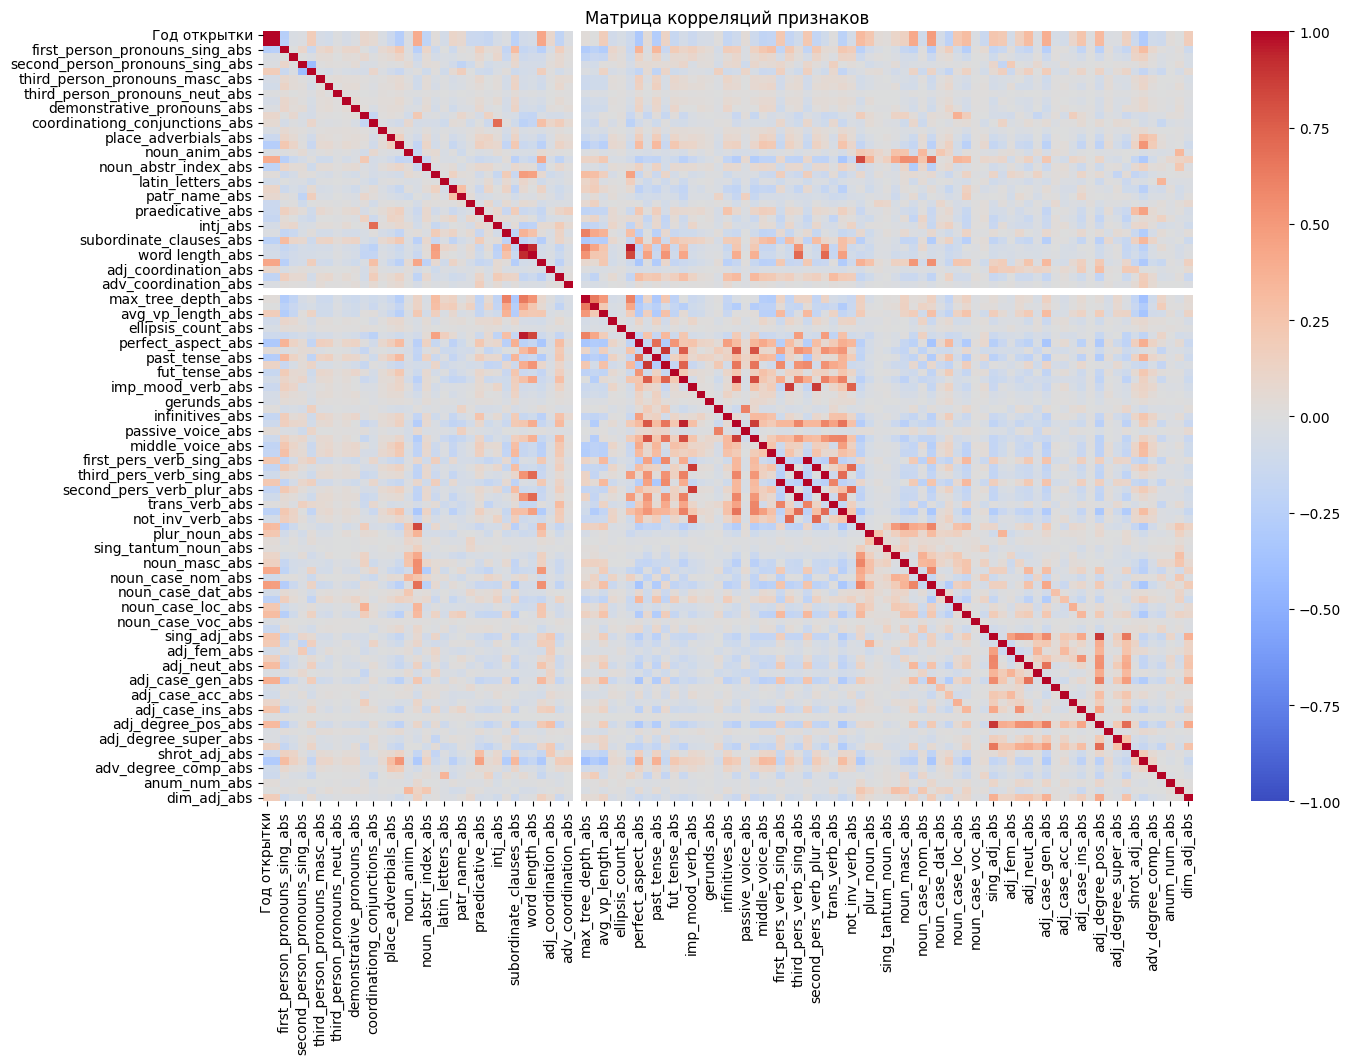

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем корреляционную матрицу
corr_matrix = normalized_feature_matrix.corr(numeric_only=True)

# Визуализация
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляций признаков')
plt.show()

In [14]:
# 1. Сначала создаем копию normalized_feature_matrix:
fa_matrix = normalized_feature_matrix.copy(deep=True)

# 2. переименовываем столбец В fa_matrix:
fa_matrix.rename(columns={"Текст открытки": "postcard_text"}, inplace=True)

# 3. Дропаем столбец 'Год открытки'
fa_matrix = fa_matrix.drop('Год открытки', axis=1)

fa_matrix.head()


,postcard_text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1900,3.774,0.943,0.000,1.887,3.774,0.000,0.0,0.0,...,0.0,0.0,16.981,0.000,8.491,0.000,0.000,0.0,7.547,0.000
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,2.326,0.000,2.326,0.000,0.000,0.000,0.0,0.0,...,0.0,0.0,11.628,2.326,2.326,0.000,0.000,0.0,9.302,2.326
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,0.000,2.667,2.667,0.000,0.000,1.333,0.0,0.0,...,0.0,0.0,26.667,1.333,17.333,1.333,2.667,0.0,12.000,1.333
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,6.122,2.041,0.000,2.041,0.000,0.000,0.0,0.0,...,0.0,0.0,14.286,4.082,6.122,0.000,4.082,0.0,2.041,2.041
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1900,3.448,0.000,0.000,6.897,3.448,0.000,0.0,0.0,...,0.0,0.0,13.793,6.897,0.000,0.000,0.000,0.0,0.000,0.000


In [15]:
# Выбираем только числовые признаки (исключаем метаданные)
feature_columns = [col for col in fa_matrix.columns if col not in ['postcard_text', 'decade']]

# Создаем DataFrame только с признаками для факторного анализа
analysis_df = fa_matrix[feature_columns].copy(deep=True)

# Убедимся, что все данные числовые
print(analysis_df.dtypes)

first_person_pronouns_sing_abs     float64
first_person_pronouns_plur_abs     float64
second_person_pronouns_sing_abs    float64
second_person_pronouns_plur_abs    float64
third_person_pronouns_masc_abs     float64
                                    ...   
adv_degree_comp_abs                float64
quant_num_abs                      float64
anum_num_abs                       float64
dim_nouns_abs                      float64
dim_adj_abs                        float64
Length: 103, dtype: object


In [16]:
analysis_df

,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,demonstrative_pronouns_abs,prepositions_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,3.774,0.943,0.000,1.887,3.774,0.000,0.0,0.0,0.0,10.377,...,0.0,0.000,16.981,0.000,8.491,0.000,0.000,0.0,7.547,0.000
1,2.326,0.000,2.326,0.000,0.000,0.000,0.0,0.0,0.0,11.628,...,0.0,0.000,11.628,2.326,2.326,0.000,0.000,0.0,9.302,2.326
2,0.000,2.667,2.667,0.000,0.000,1.333,0.0,0.0,0.0,4.000,...,0.0,0.000,26.667,1.333,17.333,1.333,2.667,0.0,12.000,1.333
3,6.122,2.041,0.000,2.041,0.000,0.000,0.0,0.0,0.0,8.163,...,0.0,0.000,14.286,4.082,6.122,0.000,4.082,0.0,2.041,2.041
4,3.448,0.000,0.000,6.897,3.448,0.000,0.0,0.0,0.0,6.897,...,0.0,0.000,13.793,6.897,0.000,0.000,0.000,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,1.562,0.000,0.000,1.562,0.000,0.000,0.0,0.0,0.0,10.938,...,0.0,0.000,18.750,1.562,7.812,0.000,0.000,0.0,3.125,0.000
39993,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,11.765,...,0.0,0.000,29.412,0.000,5.882,0.000,0.000,0.0,0.000,0.000
39994,3.704,0.000,0.000,7.407,0.000,0.000,0.0,0.0,0.0,3.704,...,0.0,0.000,25.926,0.000,3.704,0.000,3.704,0.0,0.000,3.704
39995,2.128,0.000,4.255,4.255,0.000,0.000,0.0,0.0,0.0,6.383,...,0.0,2.128,46.809,0.000,2.128,0.000,0.000,0.0,4.255,4.255


In [17]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42656 sha256=9bcd5371ec4cde4e2191e28e8659961f378fa72c4dcccfca5239b6feade73945
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [18]:
# Находим столбцы, содержащие inf
inf_cols = analysis_df.columns[~np.isfinite(analysis_df).any()]
print("Столбцы, содержащие inf:", inf_cols)

df_with_inf = analysis_df[inf_cols]

# 3. Создаем булеву маску, где True соответствует строкам, содержащим хотя бы один inf
rows_with_inf = (~np.isfinite(df_with_inf)).any(axis=1)

# 4. Считаем количество строк, содержащих хотя бы один NaN
print(rows_with_inf.sum())

nan_cols = analysis_df.columns[analysis_df.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)

df_with_nan = analysis_df[nan_cols]

# 3. Создаем булеву маску, где True соответствует строкам, содержащим хотя бы один NaN
rows_with_nan = df_with_nan.isnull().any(axis=1)

# 4. Считаем количество строк, содержащих хотя бы один NaN
print(rows_with_nan.sum())

for col in nan_cols:
    analysis_df[col] = analysis_df[col].fillna(0).astype('float64')


print(analysis_df.isnull().sum())

Столбцы, содержащие inf: Index([], dtype='object')
0
Столбцы, содержащие NaN: Index(['noun_abstr_index_abs', 'adj_abstr_index_abs'], dtype='object')
3147
first_person_pronouns_sing_abs     0
first_person_pronouns_plur_abs     0
second_person_pronouns_sing_abs    0
second_person_pronouns_plur_abs    0
third_person_pronouns_masc_abs     0
                                  ..
adv_degree_comp_abs                0
quant_num_abs                      0
anum_num_abs                       0
dim_nouns_abs                      0
dim_adj_abs                        0
Length: 103, dtype: int64


In [19]:
nan_cols = analysis_df.columns[analysis_df.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)

df_with_nan = analysis_df[nan_cols]

# 3. Создаем булеву маску, где True соответствует строкам, содержащим хотя бы один NaN
rows_with_nan = df_with_nan.isnull().any(axis=1)

# 4. Считаем количество строк, содержащих хотя бы один NaN
print(rows_with_nan.sum())


Столбцы, содержащие NaN: Index([], dtype='object')
0


In [20]:
stddevs = analysis_df.std()
print(stddevs[stddevs == 0])

other_coordination_abs    0.0
dtype: float64


In [21]:
analysis_df = analysis_df.drop('other_coordination_abs', axis=1)
stddevs = analysis_df.std()
print(stddevs[stddevs == 0])

Series([], dtype: float64)


In [22]:
feature_columns_new = [col for col in analysis_df.columns]
len(feature_columns_new)

102

In [23]:
from factor_analyzer import FactorAnalyzer

# Инициализация PFA без вращения
fa = FactorAnalyzer(n_factors=len(feature_columns), rotation=None, method='principal')

# Подгонка модели
fa.fit(analysis_df[feature_columns_new])

# Собственные значения
ev, _ = fa.get_eigenvalues()

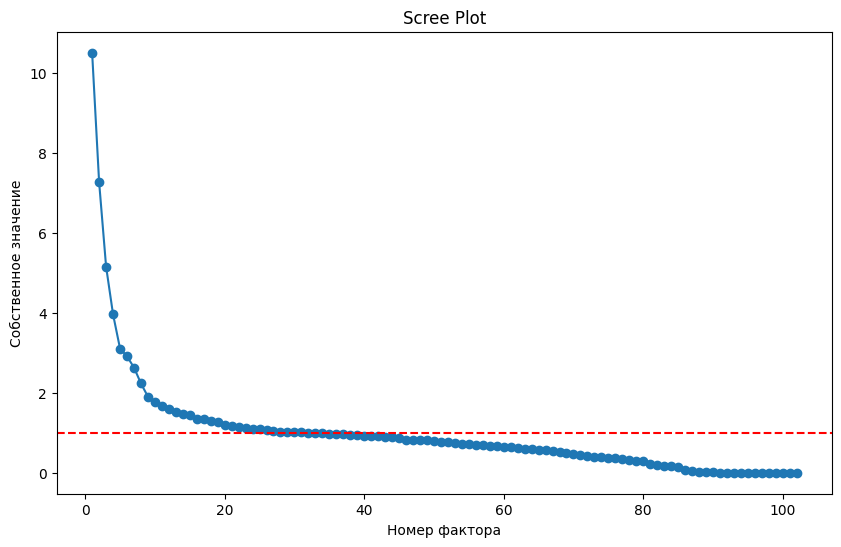

    Factor  Eigenvalue  % of Variance  Cumulative %
0        1   10.503810      10.297853     10.297853
1        2    7.270635       7.128074     17.425926
2        3    5.157021       5.055903     22.481830
3        4    3.959460       3.881823     26.363653
4        5    3.106641       3.045727     29.409380
5        6    2.910810       2.853735     32.263116
6        7    2.630903       2.579317     34.842433
7        8    2.232136       2.188369     37.030802
8        9    1.902804       1.865494     38.896295
9       10    1.765371       1.730755     40.627051
10      11    1.670675       1.637917     42.264967


In [24]:
# График осыпи
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.title('Scree Plot')
plt.xlabel('Номер фактора')
plt.ylabel('Собственное значение')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

# Таблица собственных значений и доли дисперсии
eigenvalues_table = pd.DataFrame({
    'Factor': range(1, len(ev)+1),
    'Eigenvalue': ev,
    '% of Variance': (ev / ev.sum()) * 100,
    'Cumulative %': (ev.cumsum() / ev.sum()) * 100
})

print(eigenvalues_table.head(11))  

In [26]:
# Инициализация модели с 8 факторами
fa_promax = FactorAnalyzer(n_factors=8, rotation='promax', method='principal')
fa_promax.fit(analysis_df[feature_columns_new])

# Факторные нагрузки
loadings = pd.DataFrame(
    fa_promax.loadings_,
    columns=[f'Factor {i+1}' for i in range(8)],
    index=feature_columns_new
)

# Сохраняем нагрузки в CSV
loadings.to_csv('factor_loadings.csv')

In [27]:
# Выводим значимые нагрузки 
significant_loadings = loadings.applymap(lambda x: x if abs(x) > 0.3 else None)
# significant_loadings.dropna(how='all')

for factor in significant_loadings.columns:
    print(f'Нагрузки для {factor}:')

    # Берём нагрузки для текущего фактора и исключаем NaN
    for feature, loading in significant_loadings[factor].items():
        if not pd.isna(loading):
            print(f'  - {feature}: {loading}')
    print()

Нагрузки для Factor 1:
  - first_person_pronouns_sing_abs: 0.4582339097436965
  - time_adverbials_abs: 0.48206076386729774
  - propr_name_abs: -0.39759456191217196
  - praedicative_abs: 0.4031743674099886
  - mean_sentence_length_abs: -0.5585661052796961
  - subordinate_clauses_abs: 0.520929341355954
  - type-token ratio_abs: -0.5280519969572031
  - word length_abs: -0.3758559397950003
  - noun_coordination_abs: -0.3418371796878217
  - max_tree_depth_abs: -0.7415686644882564
  - avg_np_length_abs: -0.6303265072546894
  - avg_vp_length_abs: -0.5180394909945527
  - flesch_kincaid_index_abs: -0.49373861560706883
  - perfect_aspect_abs: 0.6838914532467453
  - past_tense_abs: 0.6618832641120294
  - fut_tense_abs: 0.4369322724827689
  - infinitives_abs: 0.4181209620134581
  - middle_voice_abs: 0.5398394396585756
  - neg_polarity_abs: 0.4469751900852099
  - intr_verb_abs: 0.4058003921248008
  - noun_case_ins_abs: -0.32343134209534147
  - adv_degree_pos_abs: 0.6544271030148139

Нагрузки для Fa

/tmp/ipykernel_31/2351366798.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significant_loadings = loadings.applymap(lambda x: x if abs(x) > 0.3 else None)


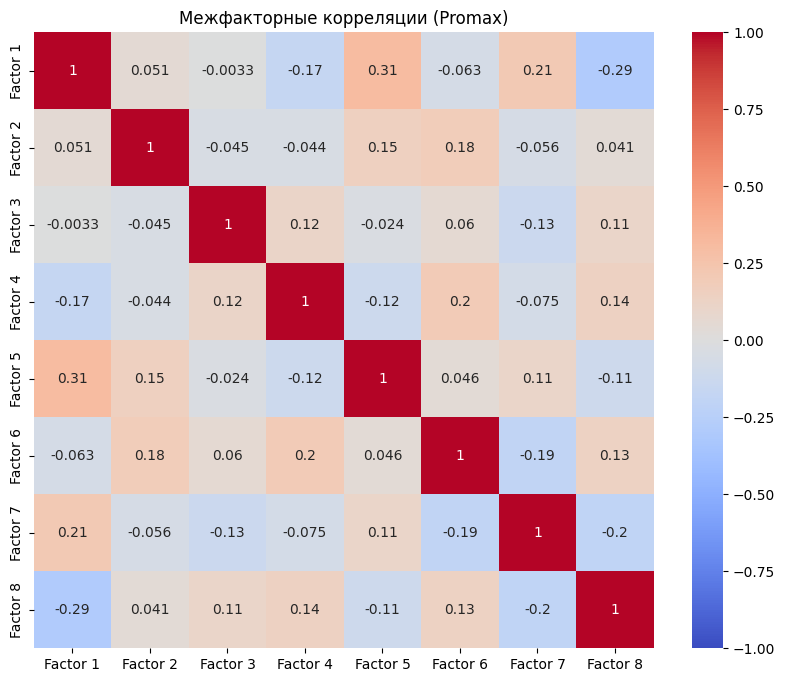

In [28]:
# Получаем факторные корреляции
factor_corr = pd.DataFrame(
    fa_promax.phi_,
    columns=[f'Factor {i+1}' for i in range(8)],
    index=[f'Factor {i+1}' for i in range(8)]
)

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(factor_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Межфакторные корреляции (Promax)')
plt.show()

In [29]:
# Порог значимости для включения признаков
threshold = 0.30

# Находим абсолютные нагрузки
loadings_abs = loadings.abs()

# Индексы факторов с максимальной нагрузкой для каждого признака
max_index = loadings_abs.idxmax(axis=1)

# Создаем словарь для хранения признаков по факторам
factor_dict = {}

# Заполняем словарь, выбирая только те нагрузки, которые выше порога
for feature in loadings.index:
    factor = max_index[feature]
    max_loading = loadings_abs.loc[feature, factor]

    if max_loading > threshold:
        if factor not in factor_dict:
            factor_dict[factor] = []
        factor_dict[factor].append([feature, float(loadings.loc[feature, factor])])

factor_dict


{'Factor 1': [['first_person_pronouns_sing_abs', 0.4582339097436965],
  ['time_adverbials_abs', 0.48206076386729774],
  ['propr_name_abs', -0.39759456191217196],
  ['praedicative_abs', 0.4031743674099886],
  ['mean_sentence_length_abs', -0.5585661052796961],
  ['subordinate_clauses_abs', 0.520929341355954],
  ['max_tree_depth_abs', -0.7415686644882564],
  ['avg_np_length_abs', -0.6303265072546894],
  ['avg_vp_length_abs', -0.5180394909945527],
  ['perfect_aspect_abs', 0.6838914532467453],
  ['past_tense_abs', 0.6618832641120294],
  ['fut_tense_abs', 0.4369322724827689],
  ['infinitives_abs', 0.4181209620134581],
  ['middle_voice_abs', 0.5398394396585756],
  ['neg_polarity_abs', 0.4469751900852099],
  ['noun_case_ins_abs', -0.32343134209534147],
  ['adv_degree_pos_abs', 0.6544271030148139]],
 'Factor 7': [['second_person_pronouns_plur_abs', -0.35295708836465406],
  ['noun_anim_abs', 0.5682029532383007],
  ['patr_name_abs', -0.4024023782367017],
  ['participles_abs', -0.33484932381369786

## Factor scores

In [30]:
normalized_feature_matrix

,Текст открытки,Год открытки,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906,1900,3.774,0.943,0.000,1.887,3.774,0.000,0.0,...,0.0,0.000,16.981,0.000,8.491,0.000,0.000,0.0,7.547,0.000
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,1910,2.326,0.000,2.326,0.000,0.000,0.000,0.0,...,0.0,0.000,11.628,2.326,2.326,0.000,0.000,0.0,9.302,2.326
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,1910,0.000,2.667,2.667,0.000,0.000,1.333,0.0,...,0.0,0.000,26.667,1.333,17.333,1.333,2.667,0.0,12.000,1.333
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,1910,6.122,2.041,0.000,2.041,0.000,0.000,0.0,...,0.0,0.000,14.286,4.082,6.122,0.000,4.082,0.0,2.041,2.041
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906,1900,3.448,0.000,0.000,6.897,3.448,0.000,0.0,...,0.0,0.000,13.793,6.897,0.000,0.000,0.000,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1984,1980,1.562,0.000,0.000,1.562,0.000,0.000,0.0,...,0.0,0.000,18.750,1.562,7.812,0.000,0.000,0.0,3.125,0.000
39993,"С новым годом! Милая, и дорогая, Тома. От всей...",1988,1980,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.000,29.412,0.000,5.882,0.000,0.000,0.0,0.000,0.000
39994,Дорогие мой [^мои] всех вас я поздравляю с нов...,1981,1980,3.704,0.000,0.000,7.407,0.000,0.000,0.0,...,0.0,0.000,25.926,0.000,3.704,0.000,3.704,0.0,0.000,3.704
39995,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1985,1980,2.128,0.000,4.255,4.255,0.000,0.000,0.0,...,0.0,2.128,46.809,0.000,2.128,0.000,0.000,0.0,4.255,4.255


In [31]:
nan_cols = normalized_feature_matrix.columns[normalized_feature_matrix.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)



Столбцы, содержащие NaN: Index(['noun_abstr_index_abs', 'adj_abstr_index_abs'], dtype='object')


In [32]:
df_with_nan = normalized_feature_matrix[nan_cols]

# 3. Создаем булеву маску, где True соответствует строкам, содержащим хотя бы один NaN
rows_with_nan = df_with_nan.isnull().any(axis=1)

# 4. Считаем количество строк, содержащих хотя бы один NaN
print(rows_with_nan.sum())

3147


In [33]:
for col in nan_cols:
    normalized_feature_matrix[col] = analysis_df[col].fillna(0).astype('float64')


nan_cols = normalized_feature_matrix.columns[normalized_feature_matrix.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)

Столбцы, содержащие NaN: Index([], dtype='object')


In [34]:
standardized_feature_matrix  = normalized_feature_matrix.copy()
standardized_feature_matrix

,Текст открытки,Год открытки,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1906,1900,3.774,0.943,0.000,1.887,3.774,0.000,0.0,...,0.0,0.000,16.981,0.000,8.491,0.000,0.000,0.0,7.547,0.000
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,1910,2.326,0.000,2.326,0.000,0.000,0.000,0.0,...,0.0,0.000,11.628,2.326,2.326,0.000,0.000,0.0,9.302,2.326
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,1910,0.000,2.667,2.667,0.000,0.000,1.333,0.0,...,0.0,0.000,26.667,1.333,17.333,1.333,2.667,0.0,12.000,1.333
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,1910,6.122,2.041,0.000,2.041,0.000,0.000,0.0,...,0.0,0.000,14.286,4.082,6.122,0.000,4.082,0.0,2.041,2.041
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1906,1900,3.448,0.000,0.000,6.897,3.448,0.000,0.0,...,0.0,0.000,13.793,6.897,0.000,0.000,0.000,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1984,1980,1.562,0.000,0.000,1.562,0.000,0.000,0.0,...,0.0,0.000,18.750,1.562,7.812,0.000,0.000,0.0,3.125,0.000
39993,"С новым годом! Милая, и дорогая, Тома. От всей...",1988,1980,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.000,29.412,0.000,5.882,0.000,0.000,0.0,0.000,0.000
39994,Дорогие мой [^мои] всех вас я поздравляю с нов...,1981,1980,3.704,0.000,0.000,7.407,0.000,0.000,0.0,...,0.0,0.000,25.926,0.000,3.704,0.000,3.704,0.0,0.000,3.704
39995,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1985,1980,2.128,0.000,4.255,4.255,0.000,0.000,0.0,...,0.0,2.128,46.809,0.000,2.128,0.000,0.000,0.0,4.255,4.255


In [35]:
standardized_feature_matrix  = standardized_feature_matrix .drop(['Текст открытки', 'Год открытки', 'decade'], axis=1)
standardized_feature_matrix

,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,demonstrative_pronouns_abs,prepositions_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,3.774,0.943,0.000,1.887,3.774,0.000,0.0,0.0,0.0,10.377,...,0.0,0.000,16.981,0.000,8.491,0.000,0.000,0.0,7.547,0.000
1,2.326,0.000,2.326,0.000,0.000,0.000,0.0,0.0,0.0,11.628,...,0.0,0.000,11.628,2.326,2.326,0.000,0.000,0.0,9.302,2.326
2,0.000,2.667,2.667,0.000,0.000,1.333,0.0,0.0,0.0,4.000,...,0.0,0.000,26.667,1.333,17.333,1.333,2.667,0.0,12.000,1.333
3,6.122,2.041,0.000,2.041,0.000,0.000,0.0,0.0,0.0,8.163,...,0.0,0.000,14.286,4.082,6.122,0.000,4.082,0.0,2.041,2.041
4,3.448,0.000,0.000,6.897,3.448,0.000,0.0,0.0,0.0,6.897,...,0.0,0.000,13.793,6.897,0.000,0.000,0.000,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,1.562,0.000,0.000,1.562,0.000,0.000,0.0,0.0,0.0,10.938,...,0.0,0.000,18.750,1.562,7.812,0.000,0.000,0.0,3.125,0.000
39993,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,11.765,...,0.0,0.000,29.412,0.000,5.882,0.000,0.000,0.0,0.000,0.000
39994,3.704,0.000,0.000,7.407,0.000,0.000,0.0,0.0,0.0,3.704,...,0.0,0.000,25.926,0.000,3.704,0.000,3.704,0.0,0.000,3.704
39995,2.128,0.000,4.255,4.255,0.000,0.000,0.0,0.0,0.0,6.383,...,0.0,2.128,46.809,0.000,2.128,0.000,0.000,0.0,4.255,4.255


In [36]:
for column in standardized_feature_matrix.columns:
    mean = descriptive_stats.loc[column, 'mean']
    std = descriptive_stats.loc[column, 'std']

    standardized_feature_matrix[column] = (standardized_feature_matrix[column] - mean) / std
standardized_feature_matrix

,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,demonstrative_pronouns_abs,prepositions_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,1.449406,0.440745,-0.560379,-0.237629,4.940237,-0.189538,-0.052795,-0.158858,-0.310932,0.432786,...,-0.120691,-0.349925,-0.025676,-0.426798,0.916144,-0.214302,-0.521171,-0.268441,1.005580,-0.622120
1,0.697286,-0.366134,0.243286,-0.818354,-0.226989,-0.189538,-0.052795,-0.158858,-0.310932,0.730058,...,-0.120691,-0.349925,-0.718742,0.943520,-0.393028,-0.214302,-0.521171,-0.268441,1.474448,0.297763
2,-0.510885,1.915887,0.361107,-0.818354,-0.226989,2.092520,-0.052795,-0.158858,-0.310932,-1.082561,...,-0.120691,-0.349925,1.228395,0.358513,2.793792,1.721856,0.097108,-0.268441,2.195249,-0.094947
3,2.669004,1.380250,-0.560379,-0.190236,-0.226989,-0.189538,-0.052795,-0.158858,-0.310932,-0.093320,...,-0.120691,-0.349925,-0.374604,1.978034,0.413074,-0.214302,0.425141,-0.268441,-0.465410,0.185051
4,1.280075,-0.366134,-0.560379,1.304199,4.493890,-0.189538,-0.052795,-0.158858,-0.310932,-0.394156,...,-0.120691,-0.349925,-0.438434,3.636438,-0.886967,-0.214302,-0.521171,-0.268441,-1.010686,-0.622120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39992,0.300449,-0.366134,-0.560379,-0.337648,-0.226989,-0.189538,-0.052795,-0.158858,-0.310932,0.566095,...,-0.120691,-0.349925,0.203361,0.493424,0.771954,-0.214302,-0.521171,-0.268441,-0.175807,-0.622120
39993,-0.510885,-0.366134,-0.560379,-0.818354,-0.226989,-0.189538,-0.052795,-0.158858,-0.310932,0.762612,...,-0.120691,-0.349925,1.583797,-0.426798,0.362108,-0.214302,-0.521171,-0.268441,-1.010686,-0.622120
39994,1.413046,-0.366134,-0.560379,1.461152,-0.226989,-0.189538,-0.052795,-0.158858,-0.310932,-1.152899,...,-0.120691,-0.349925,1.132456,-0.426798,-0.100402,-0.214302,0.337511,-0.268441,-1.010686,0.842732
39995,0.594440,-0.366134,0.909783,0.491123,-0.226989,-0.189538,-0.052795,-0.158858,-0.310932,-0.516296,...,-0.120691,1.235476,3.836231,-0.426798,-0.435074,-0.214302,-0.521171,-0.268441,0.126085,1.060641


In [37]:
standardized_feature_matrix = standardized_feature_matrix.drop('other_coordination_abs', axis=1)
stddevs = standardized_feature_matrix.std()
print(stddevs[stddevs == 0])

Series([], dtype: float64)


In [38]:
# Среднее после стандартизации должно быть ~0
print(standardized_feature_matrix[feature_columns_new].mean().round(2))  

# Стандартное отклонение должно быть ~1
print(standardized_feature_matrix[feature_columns_new].std().round(2))   

first_person_pronouns_sing_abs     0.0
first_person_pronouns_plur_abs    -0.0
second_person_pronouns_sing_abs   -0.0
second_person_pronouns_plur_abs   -0.0
third_person_pronouns_masc_abs    -0.0
                                  ... 
adv_degree_comp_abs                0.0
quant_num_abs                      0.0
anum_num_abs                      -0.0
dim_nouns_abs                     -0.0
dim_adj_abs                       -0.0
Length: 102, dtype: float64
first_person_pronouns_sing_abs     1.0
first_person_pronouns_plur_abs     1.0
second_person_pronouns_sing_abs    1.0
second_person_pronouns_plur_abs    1.0
third_person_pronouns_masc_abs     1.0
                                  ... 
adv_degree_comp_abs                1.0
quant_num_abs                      1.0
anum_num_abs                       1.0
dim_nouns_abs                      1.0
dim_adj_abs                        1.0
Length: 102, dtype: float64


In [39]:
# 1. Создаем DataFrame factor_scores с текстами и декадами
factor_scores = normalized_feature_matrix[['Текст открытки', 'decade']].copy()

# 2. Связываем standardized_feature_matrix с factor_scores по индексам
standardized_features = standardized_feature_matrix.copy()
standardized_features.index = factor_scores.index

In [40]:
# 3. Функция для расчета факторной оценки
def calculate_factor_score(row, factor_features):
    score = 0
    for feature, loading in factor_features:
        # Получаем стандартизированное значение признака
        value = row[feature]
        # Учитываем знак нагрузки: + если loading > 0, - если loading < 0
        score += value * (1 if loading > 0 else -1)
    return score

In [41]:
# 4. Для каждого фактора из factor_dict вычисляем оценку
for factor, features in factor_dict.items():
    # Признаки и их нагрузки для текущего фактора
    factor_features = [(feat[0], feat[1]) for feat in features]

    # Проверяем наличие признаков в standardized_features
    missing = [feat[0] for feat in features if feat[0] not in standardized_features.columns]
    if missing:
        print(f"Предупреждение: Признаки {missing} отсутствуют в standardized_feature_matrix.")
        continue

    # Рассчитываем факторную оценку
    factor_scores[factor] = standardized_features.apply(
        lambda row: calculate_factor_score(row, factor_features), axis=1
    )

factor_scores.head()

,Текст открытки,decade,Factor 1,Factor 7,Factor 8,Factor 3,Factor 2,Factor 4,Factor 6,Factor 5
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1900,12.910563,3.842399,-0.379714,0.992725,-0.511630,-2.885691,-1.089779,4.558516
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,3.342178,2.291694,-2.622009,1.260449,-0.315087,-6.018134,-5.719141,0.259031
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,14.998628,5.535524,-3.652019,-1.014537,-1.432348,1.379061,-6.250333,0.452422
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,12.486352,-1.875514,-3.797966,-0.240230,-1.696738,2.070709,-2.071714,-2.145830
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1900,-2.251322,-5.775504,-2.526992,2.105930,-1.818155,0.547746,-0.631056,-2.145830


In [42]:
factor_scores.to_csv('factor_scored_pishu_tebe.csv')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


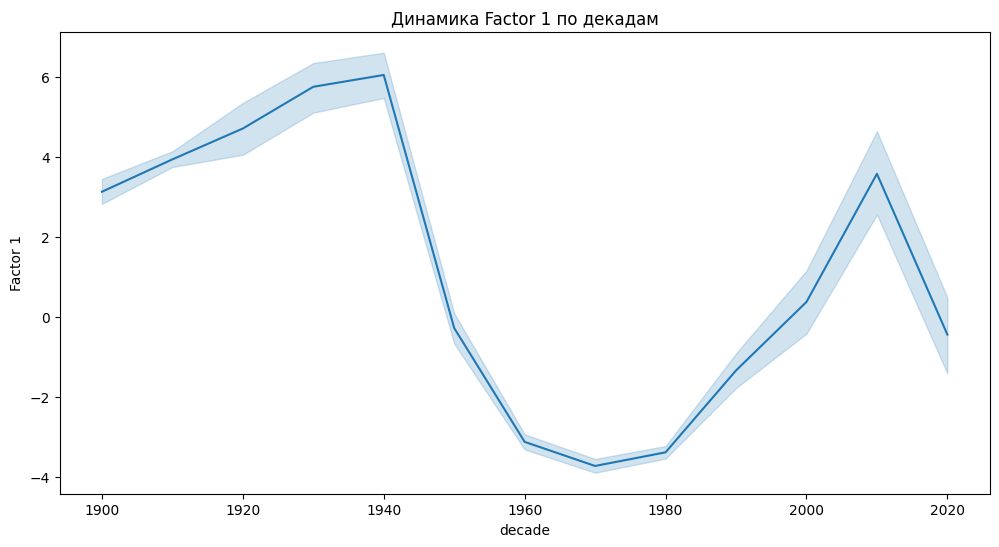

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=factor_scores, x='decade', y='Factor 1')
plt.title('Динамика Factor 1 по декадам')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

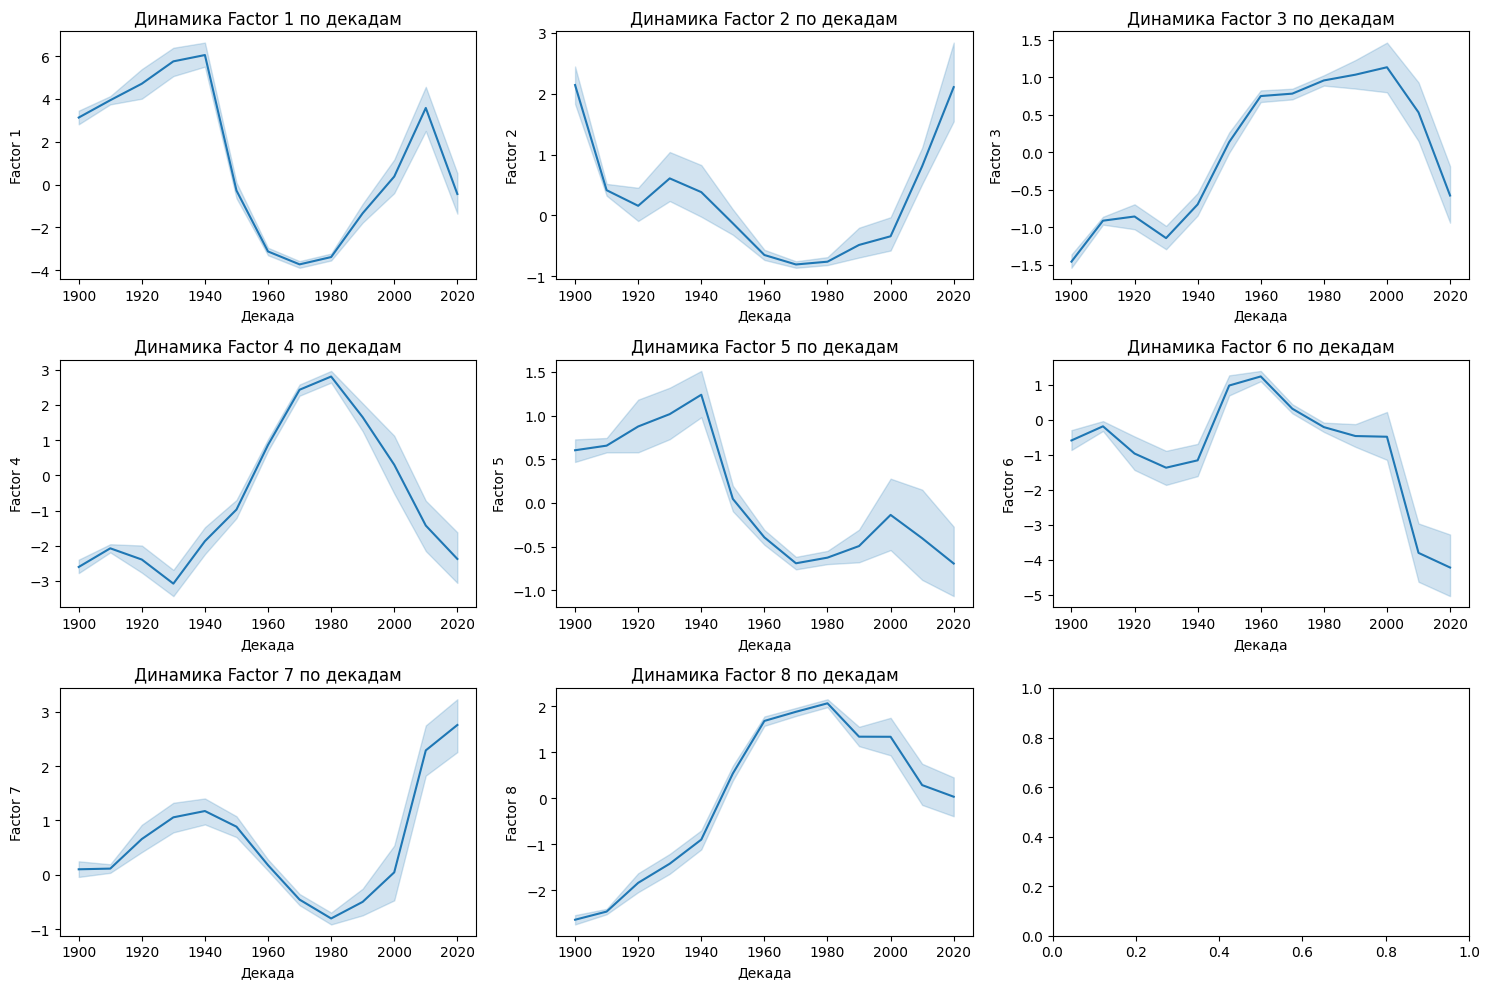

In [45]:
factors = [f'Factor {i}' for i in range(1, 9)]  # Список факторов

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Преобразуем массив подграфиков в одномерный для удобства

# Перебираем факторы и создаем графики
for i, factor in enumerate(factors):
    sns.lineplot(data=factor_scores, x='decade', y=factor, ax=axes[i])
    axes[i].set_title(f'Динамика {factor} по декадам')
    axes[i].set_xlabel('Декада')
    axes[i].set_ylabel(factor)

plt.tight_layout() 
plt.show()


In [46]:
factor_means_by_decade = factor_scores.copy().drop(columns=['Текст открытки'], errors='ignore')

# Группируем по декадам и вычисляем среднее
factor_means_by_decade = factor_means_by_decade.groupby('decade').mean()


# Выводим таблицу
factor_means_by_decade

,Factor 1,Factor 7,Factor 8,Factor 3,Factor 2,Factor 4,Factor 6,Factor 5
decade,,,,,,,,
1900,3.128629,0.100229,-2.639162,-1.460165,2.142793,-2.603478,-0.589853,0.603299
1910,3.937740,0.112790,-2.461889,-0.913191,0.414427,-2.073527,-0.186407,0.655925
1920,4.709154,0.657019,-1.836462,-0.857241,0.157899,-2.392358,-0.963693,0.875373
1930,5.752293,1.056232,-1.420483,-1.145698,0.608582,-3.077047,-1.367838,1.016842
1940,6.047323,1.172103,-0.896148,-0.696171,0.382829,-1.870001,-1.157449,1.238633
1950,-0.278939,0.884085,0.541819,0.137112,-0.129598,-0.972136,0.978120,0.046583
1960,-3.124061,0.175778,1.685308,0.750922,-0.650556,0.865111,1.237363,-0.394013
1970,-3.726406,-0.457787,1.884156,0.783115,-0.805894,2.433275,0.316446,-0.690600
1980,-3.385750,-0.804706,2.068729,0.959407,-0.760187,2.808090,-0.209005,-0.625868


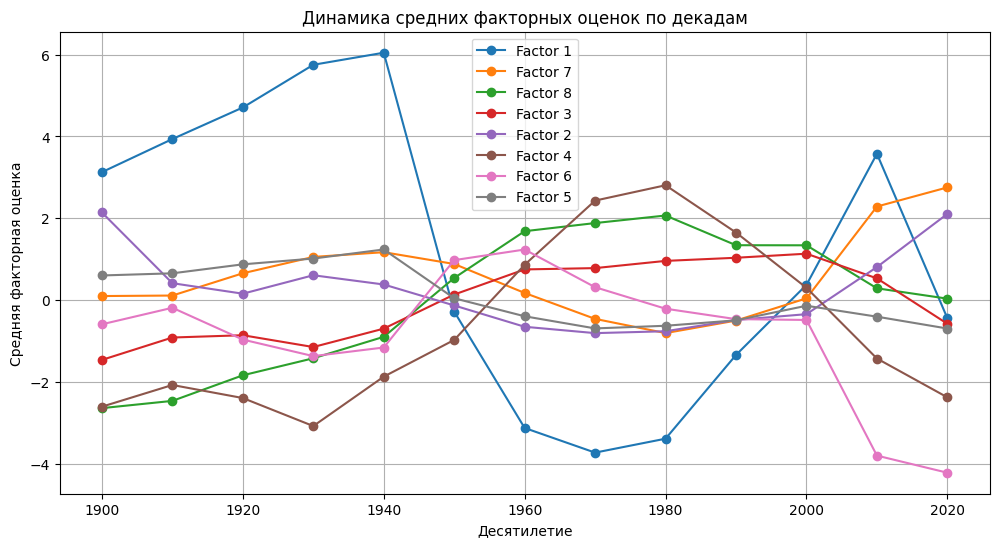

In [47]:
plt.figure(figsize=(12, 6))

# Для каждого фактора строим линию
for factor in factor_means_by_decade.columns:
    if factor.startswith('Factor'):
        plt.plot(
            factor_means_by_decade.index,
            factor_means_by_decade[factor],
            marker='o',
            label=factor
        )

plt.title('Динамика средних факторных оценок по декадам')
plt.xlabel('Десятилетие')
plt.ylabel('Средняя факторная оценка')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Выделяем только факторные оценки (без года)
data_for_clustering = cluster_by_factors[[col for col in cluster_by_factors.columns if col.startswith('Factor')]]

# 2. Стандартизация
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# 4. Кластеризация с оптимальным k (например, k=3)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
cluster_by_factors['Период'] = clusters

# 5. Визуализация по годам
plt.figure(figsize=(12, 6))
sns.boxplot(x='Период', y='Год открытки', data=cluster_by_factors)
plt.title('Распределение годов по кластерам')
plt.show()

# temporal classification

In [79]:
factor_scores = pd.read_csv("/kaggle/input/factor-scored-pishu-tebe/factor_scored_pishu_tebe.csv")


In [80]:
factor_scores

,Unnamed: 0,Текст открытки,decade,Factor 1,Factor 3,Factor 8,Factor 7,Factor 9,Factor 2,Factor 4,Factor 6,Factor 5
0,0,"{Милый Жоржик! Простите, голубчик, за молчание...",1900,11.177225,0.824474,-2.222890,3.229749,-0.464307,-0.043448,-2.885691,-1.557961,4.558516
1,1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,2.749839,-1.006027,-4.420608,4.362104,2.273618,-2.504431,-6.018134,-3.529796,0.259031
2,2,Милая моя Олечка! Открытку твою получила. Спас...,1910,13.798344,-1.070968,-4.410506,6.022512,-1.160603,-3.670938,1.379061,-4.011744,0.452422
3,3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,9.924345,-2.798516,-5.212038,-1.466646,0.346438,-3.704034,2.070709,-0.064418,-2.145830
4,4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1900,-1.691950,3.775391,-0.754552,-6.179739,-1.160603,-3.621868,0.547746,1.172657,-2.145830
...,...,...,...,...,...,...,...,...,...,...,...,...
39991,39992,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1980,10.560771,1.553140,1.580947,0.933852,-0.007248,-2.654989,-4.279227,0.519381,-2.145830
39992,39993,"С новым годом! Милая, и дорогая, Тома. От всей...",1980,-4.578485,1.392283,1.242228,-4.648397,-1.160603,-6.838564,4.614246,-5.130673,-2.145830
39993,39994,Дорогие мой [^мои] всех вас я поздравляю с нов...,1980,-4.030059,3.513131,-2.056847,-0.725629,-1.160603,-1.611964,4.313123,0.959671,-2.145830
39994,39995,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1980,-0.304610,1.518561,-4.428237,-1.179256,-1.160603,-6.252580,21.883171,-3.924923,-2.145830


In [81]:


bins = [1900, 1960, 2021]  # Границы интервалов
labels = ['1900-1960', '1960-2020']  # Метки для интервалов

factor_scores['decade_class'] = pd.cut(factor_scores['decade'], bins=bins, labels=labels, right=False)

factor_scores


,Unnamed: 0,Текст открытки,decade,Factor 1,Factor 3,Factor 8,Factor 7,Factor 9,Factor 2,Factor 4,Factor 6,Factor 5,decade_class
0,0,"{Милый Жоржик! Простите, голубчик, за молчание...",1900,11.177225,0.824474,-2.222890,3.229749,-0.464307,-0.043448,-2.885691,-1.557961,4.558516,1900-1960
1,1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,2.749839,-1.006027,-4.420608,4.362104,2.273618,-2.504431,-6.018134,-3.529796,0.259031,1900-1960
2,2,Милая моя Олечка! Открытку твою получила. Спас...,1910,13.798344,-1.070968,-4.410506,6.022512,-1.160603,-3.670938,1.379061,-4.011744,0.452422,1900-1960
3,3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,9.924345,-2.798516,-5.212038,-1.466646,0.346438,-3.704034,2.070709,-0.064418,-2.145830,1900-1960
4,4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1900,-1.691950,3.775391,-0.754552,-6.179739,-1.160603,-3.621868,0.547746,1.172657,-2.145830,1900-1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39991,39992,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1980,10.560771,1.553140,1.580947,0.933852,-0.007248,-2.654989,-4.279227,0.519381,-2.145830,1960-2020
39992,39993,"С новым годом! Милая, и дорогая, Тома. От всей...",1980,-4.578485,1.392283,1.242228,-4.648397,-1.160603,-6.838564,4.614246,-5.130673,-2.145830,1960-2020
39993,39994,Дорогие мой [^мои] всех вас я поздравляю с нов...,1980,-4.030059,3.513131,-2.056847,-0.725629,-1.160603,-1.611964,4.313123,0.959671,-2.145830,1960-2020
39994,39995,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1980,-0.304610,1.518561,-4.428237,-1.179256,-1.160603,-6.252580,21.883171,-3.924923,-2.145830,1960-2020


In [83]:
# Перемешиваем данные
factor_scores_shuffled = factor_scores.sample(frac=1, random_state=42).reset_index(drop=True)

# Проверяем результат
factor_scores_shuffled.head()

,Unnamed: 0,Текст открытки,decade,Factor 1,Factor 3,Factor 8,Factor 7,Factor 9,Factor 2,Factor 4,Factor 6,Factor 5,decade_class
0,7516,Дорогие мои! Ответ Ваш от [?соседа] я получил....,1900,18.731584,1.581063,-6.853836,-3.381019,-1.160603,2.482456,-5.049556,2.596583,6.135572,1900-1960
1,13705,Милая Женичка [^Женечка]! Поздравляю Вас и Вит...,1950,-9.977637,2.966068,1.597462,3.965990,-1.160603,0.213941,-7.042805,4.036415,-2.145830,1900-1960
2,28383,Понедельник (30) Выборг Шлю сердечный привет!,1910,-11.048253,-12.166366,-4.823077,9.387747,-1.160603,-2.490881,3.185550,-7.829386,-2.145830,1900-1960
3,10031,Витя! Поздравляю тебя с праздником 1 мая. Жела...,1970,-10.383183,-3.586188,-1.886680,-1.475988,-1.160603,8.085184,-3.716433,7.671369,8.869983,1960-2020
4,18670,"Дорогие Николай Иванович, Александра Тимофеевн...",1980,0.237997,3.237962,-6.030697,-5.063815,-1.160603,-0.376900,8.956213,0.830694,-2.145830,1960-2020


In [84]:
import torch

# Проверяем, доступен ли GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {device}")

Используется устройство: cpu


In [86]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
def preprocess_text(text):
    """Предварительная обработка текста: токенизация, лемматизация, удаление стоп-слов."""
    tokens = nltk.word_tokenize(text.lower())
    stop_words = set(stopwords.words('russian'))
    stemmer = SnowballStemmer("russian")
    
    #Удалим пунктуацию
    tokens = [token for token in tokens if token.isalnum()]
    
    processed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return " ".join(processed_tokens)

In [88]:
from transformers import BertTokenizer, BertModel

# Загрузка токенизатора и модели RuBERT
tokenizer = BertTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = BertModel.from_pretrained("DeepPavlov/rubert-base-cased").to(device)

2025-05-12 09:12:15.635177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747041135.949960      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747041136.038363      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_rubert_embeddings(texts, max_length=128):
    preprocessed_texts = [preprocess_text(text) for text in texts]
    embeddings = []
    for text in preprocessed_texts:
        # Токенизация текста
        inputs = tokenizer(
            text,
            return_tensors="pt",
            max_length=max_length,
            truncation=True,
            padding="max_length"
        ).to(device)

        # Получение эмбеддингов
        with torch.no_grad():
            outputs = model(**inputs)

        # Используем вектор [CLS] как представление текста
        cls_embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(cls_embedding)

    return np.concatenate(embeddings, axis=0)




In [ ]:
# Получение эмбеддингов для всех текстов
text_embeddings = get_rubert_embeddings(factor_scores_shuffled["Текст открытки"].tolist())

In [92]:
# Факторные оценки из DataFrame
factor_features = factor_scores_shuffled.filter(regex="Factor").values

# selected_factors = ['Factor 3', 'Factor 8', 'Factor 4']

# # Извлечение факторных оценок
# factor_features = factor_scores_shuffled[selected_factors].values 


# Объединение эмбеддингов и факторных оценок
combined_features = np.hstack([text_embeddings, factor_features])

In [93]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
factor_scores_shuffled["decade_encoded"] = encoder.fit_transform(factor_scores_shuffled["decade_class"])
target = factor_scores_shuffled["decade_encoded"].values


In [94]:
target

array([0, 0, 0, ..., 1, 0, 0])

In [101]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    combined_features,
    target,
    test_size=0.2,
    stratify=target,
    random_state=42
)

In [103]:
model = xgb.XGBClassifier(
    objective="binary:logistic",  # Изменено на бинарную классификацию
    n_estimators=500,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="gpu_hist",
    predictor="gpu_predictor",
    gpu_id=0
)


model.fit(X_train, y_train)




/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [17:15:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [17:15:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [104]:
# Предсказание и оценка
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3787
           1       0.89      0.89      0.89      4213

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [17:15:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


<Axes: >

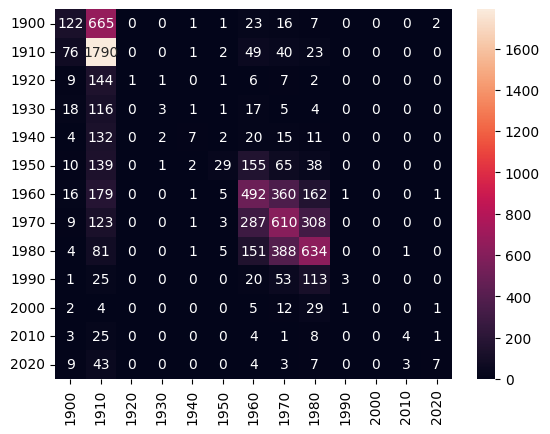

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
decade_labels = [str(decade) for decade in encoder.classes_]
sns.heatmap(cm, annot=True, fmt='d', xticklabels=decade_labels, yticklabels=decade_labels)

In [30]:
from sklearn.utils.class_weight import compute_sample_weight

# 1. Разделение данных на train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    combined_features,
    target,
    test_size=0.2,
    stratify=target,
    random_state=42
)

# 2. Вычисляем веса классов ТОЛЬКО для тренировочной части
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train  # Используем только тренировочные метки
)

# 3. Разделение train на train/validation (80/20 от X_train)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

# 4. Важно: пересчитываем веса для X_train_final
sample_weights_final, _ = train_test_split(
    sample_weights,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)


In [31]:
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb


# 2. Параметры модели с учетом дисбаланса
model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(encoder.classes_),

    # Основные параметры
    n_estimators=500,  # Увеличиваем число деревьев
    max_depth=3,       # Уменьшаем глубину для борьбы с переобучением
    learning_rate=0.05,  # Уменьшаем learning rate

    # Параметры для несбалансированных данных
    scale_pos_weight=1,  # Для мультикласса работает иначе, но лучше оставить 1
    max_delta_step=1,    # Помогает сбалансировать обновления весов

    # Регуляризация
    reg_alpha=0.5,      # L1 регуляризация
    reg_lambda=0.8,     # L2 регуляризация
    gamma=0.2,          # Минимальное сокращение потерь для разделения

    # Параметры выборок
    subsample=0.7,
    colsample_bytree=0.6,

    # GPU
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    gpu_id=0,

    # Обучение
    eval_metric='mlogloss',  # Лучшая метрика для несбалансированных классов
    early_stopping_rounds=20,
    random_state=42
)

# 3. Обучение с весами классов
model.fit(
    X_train_final,
    y_train_final,
    sample_weight=sample_weights_final,  # Важные веса
    eval_set=[(X_val, y_val)],
    verbose=10
)

[0]	validation_0-mlogloss:2.55012


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [16:05:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [16:05:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor", "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	validation_0-mlogloss:2.42260
[20]	validation_0-mlogloss:2.33230
[30]	validation_0-mlogloss:2.26286
[40]	validation_0-mlogloss:2.20827
[50]	validation_0-mlogloss:2.16420
[60]	validation_0-mlogloss:2.12487
[70]	validation_0-mlogloss:2.09299
[80]	validation_0-mlogloss:2.06547
[90]	validation_0-mlogloss:2.04029
[100]	validation_0-mlogloss:2.01792
[110]	validation_0-mlogloss:1.99761
[120]	validation_0-mlogloss:1.97917
[130]	validation_0-mlogloss:1.96223
[140]	validation_0-mlogloss:1.94626
[150]	validation_0-mlogloss:1.93161
[160]	validation_0-mlogloss:1.91816
[170]	validation_0-mlogloss:1.90586
[180]	validation_0-mlogloss:1.89386
[190]	validation_0-mlogloss:1.88301
[200]	validation_0-mlogloss:1.87203
[210]	validation_0-mlogloss:1.86207
[220]	validation_0-mlogloss:1.85209
[230]	validation_0-mlogloss:1.84187
[240]	validation_0-mlogloss:1.83240
[250]	validation_0-mlogloss:1.82407
[260]	validation_0-mlogloss:1.81600
[270]	validation_0-mlogloss:1.80750
[280]	validation_0-mlogloss:1.79984
[

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.2, gpu_id=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=1, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_class=13, ...)

In [33]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.45      0.42       837
           1       0.65      0.53      0.58      1981
           2       0.14      0.24      0.17       171
           3       0.15      0.28      0.20       165
           4       0.22      0.37      0.28       193
           5       0.19      0.24      0.21       439
           6       0.36      0.29      0.32      1217
           7       0.35      0.26      0.29      1341
           8       0.39      0.40      0.40      1265
           9       0.10      0.22      0.14       215
          10       0.00      0.00      0.00        54
          11       0.33      0.37      0.35        46
          12       0.44      0.62      0.51        76

    accuracy                           0.38      8000
   macro avg       0.29      0.33      0.30      8000
weighted avg       0.41      0.38      0.39      8000



In [97]:
model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(encoder.classes_),
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    # Параметры для дисбаланса
    scale_pos_weight=1,  # Экспериментируйте с этим значением
    max_delta_step=5,    # Увеличиваем для балансировки классов
    # Регуляризация
    reg_alpha=0.1,       # Меньше, чем было
    reg_lambda=0.3,      # Меньше, чем было
    gamma=0,             # Отключаем для начала
    # GPU
    tree_method="gpu_hist",
    predictor="gpu_predictor",
    gpu_id=0,
    # Ранняя остановка
    eval_metric="mlogloss",
    early_stopping_rounds=20,
    random_state=42
)

In [98]:
model.fit(
    X_train_final,
    y_train_final,
    sample_weight=sample_weights_final,  # Важные веса
    eval_set=[(X_val, y_val)],
    verbose=10
)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:19:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:19:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:2.51645
[10]	validation_0-mlogloss:2.22001
[20]	validation_0-mlogloss:2.05589
[30]	validation_0-mlogloss:1.95223
[40]	validation_0-mlogloss:1.87374
[50]	validation_0-mlogloss:1.81684
[60]	validation_0-mlogloss:1.77063
[70]	validation_0-mlogloss:1.72981
[80]	validation_0-mlogloss:1.69867
[90]	validation_0-mlogloss:1.67020
[100]	validation_0-mlogloss:1.64751
[110]	validation_0-mlogloss:1.62711
[120]	validation_0-mlogloss:1.60815
[130]	validation_0-mlogloss:1.59183
[140]	validation_0-mlogloss:1.57803
[150]	validation_0-mlogloss:1.56658
[160]	validation_0-mlogloss:1.55551
[170]	validation_0-mlogloss:1.54625
[180]	validation_0-mlogloss:1.53797
[190]	validation_0-mlogloss:1.53175
[199]	validation_0-mlogloss:1.52526


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0, gpu_id=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=5, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=13, ...)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=decade_labels))

In [86]:
from imblearn.ensemble import BalancedRandomForestClassifier
model_rf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model_rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))